### eCAVIAR colocalization analysis

In [2]:
library(data.table)
library(tidyverse)
library(readxl)
# library(biomaRt)
library(MetBrewer)
library(VennDiagram)
# library(eulerr)
library("RColorBrewer")
library(UpSetR)

In [24]:
eqtl <- read.table("../results_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
isoqtl <- read.table("../results_isoqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
sqtl <- read.table("../results_sqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
cell <- read.table("../cell_SCZ_sig.txt", header = T)
sex_e_m <- read.table("../results_male_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
sex_e_f <- read.table("../results_female_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
tri1_e <- read.table("../results_tri1_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
tri2_e <- read.table("../results_tri2_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
tri1_s <- read.table("../results_tri1_sqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
tri2_s <- read.table("../results_tri2_sqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)

In [25]:
loci <- list(eqtl = unique(eqtl$locus),
            isoqtl = unique(isoqtl$locus),
            sqtl = unique(sqtl$locus),
            cell = unique(cell$locus),
            sex = unique(c(sex_e_m$locus, sex_e_f$locus)),
            tri_e = unique(c(tri1_e$locus, tri2_e$locus)),
            tri_s = unique(c(tri1_s$locusm, tri2_s$locus)))

In [26]:
loci

$eqtl
 [1] 100 109 119  11 120 127 129  12 132 139 142 146 159 160 161 171  17 180 182
[20] 186 191 197  19 204 206 209 213 217 218  21 232 238 240 247 254 256 261 268
[39] 269 276 277  27 280 287 289 290 294   2  33  34  36  37   3  51  52  55   5
[58]  67  71  75  78  90   9

$isoqtl
 [1] 100 106 111 119 120 122 125 127 129  12 132 139 144 146 155 156 157 159 162
[20] 168 170 171 173 176 177  17 180 182 186 187 189 197  19 202 204 206 209 213
[39] 217 218  21 223 224 226 231 232 238 240 247 254 256 261 262 264 265 269 272
[58] 276 280 287 289 290 291 297   2 305  31  33  34  37  38   3  43  48  49   4
[77]  51  55   5  63  64  66  71  72  74  75  78  80  86  90  92

$sqtl
 [1] 100  10 102 106  11 111 119 120 125 127 139 144 153 157 160 161 162  16 168
[20]  17 171 172 176 180 182 186  19 193 197 201 208 209  21   2 213 216 217  22
[39] 223 224 226 228 231 232 236 238 240 241  24 245 247 252 253 254 256 258 262
[58] 264 265 268 269 272 274 276 280 287 289 295   3  32  34  36  37   4  41  43
[77]  44  45  51   5  55  61  63  64  68  71  72  74  75  78  80  82  88  90  92

$cell
 [1] 100 119  11 120 127 129  12 132 142 159 161 171 179  17 180 182 186 191 197
[20]  19 209 213 217 218  21 231 232 238 240 254 256 261 268 269 277  27 287 289
[39] 290 294   2  34  37   3  41  51  55   5  71  72  75  78  90   9 139 145 146
[58] 168 201 208 252 276 291  32  64  74 280  61 206  73  86 226  69 187 194 233
[77] 305  33  67 210 224 293  89

$sex
 [1] 119  11 120 127 129  12 140 146 159 171 180 182 186 197  19 213 216 217 232
[20] 238 254 256 268 276 287 289 290   2  34  37   3  51  55   5  71  75  78  90
[39] 100 106 111 125 132  17 231 240 261  43

$tri_e
 [1] 106 111 119 120 127 160 171 174 180 182 197  19 215 217 218 224 226 231 232
[20] 238 240 255 258 265 268  26 280 289  34  37  51  56   5  63  71  78  80 116
[39] 130  16 191  21 225 295  59  72

$tri_s
 [1]  11 111 119 120 127 128 129  13 135  14 160  16 171   1 180 182  19 197   2
[20] 213 215 217 224 226 231 238 240 241  25 252 258 265 269 276 280 287 289 295
[39]  30   3  34  41  51   5  55  63  71  72  73  78  80  90

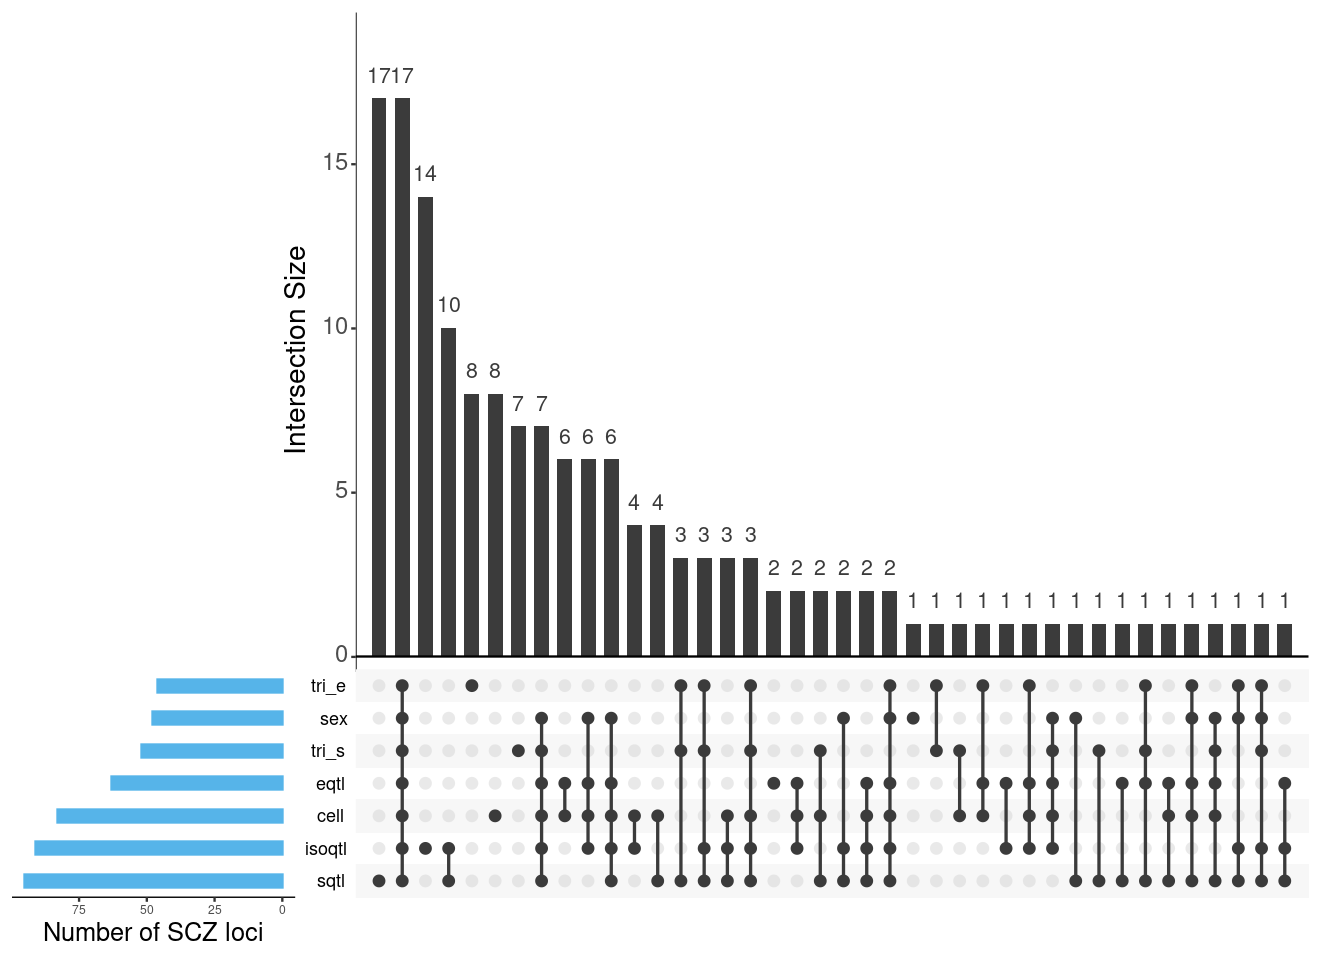

In [35]:
options(repr.plot.height = 8, repr.plot.width = 11)
upset(fromList(loci), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of SCZ loci",
      point.size = 3,
      nsets = 7,
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))

In [38]:
pdf(file = "../figures/upsetr.pdf", onefile = F, width = 11, height = 8)

# options(repr.plot.height = 8, repr.plot.width = 11)
upset(fromList(loci), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of SCZ loci",
      point.size = 3,
      nsets = 7,
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))
dev.off()

png 
  2

In [2]:
df <- data.frame("group" = rep(c("GWAS", "eQTL", "isoQTL", "sQTL", 
                             "cell type-specific eQTL", "sex specific eQTL", 
                             "trimester specific eQTL", "trimester specific sQTL"), 5),
                 "number" = c(307-181, 63, 42, 28, 9, 1, 9, 29,
                              3-1, 0, 0, 1, 0, 0, 0, 0,
                              63-41, 17, 6, 6, 2, 2, 0, 8,
                              11-5, 2, 1, 2, 0, 0, 0, 0,
                              101-43, 13, 11, 7, 4, 2, 0, 6),
                 "Trait" = c(rep("SCZ", 8), rep("ASD", 8), rep("BIP", 8), rep("ADHD", 8), rep("MDD", 8)))

In [3]:
df$group <- factor(df$group, levels = rev(c("eQTL", "isoQTL", "sQTL", 
                             "cell type-specific eQTL", "sex specific eQTL", 
                             "trimester specific eQTL", "trimester specific sQTL", "GWAS")))

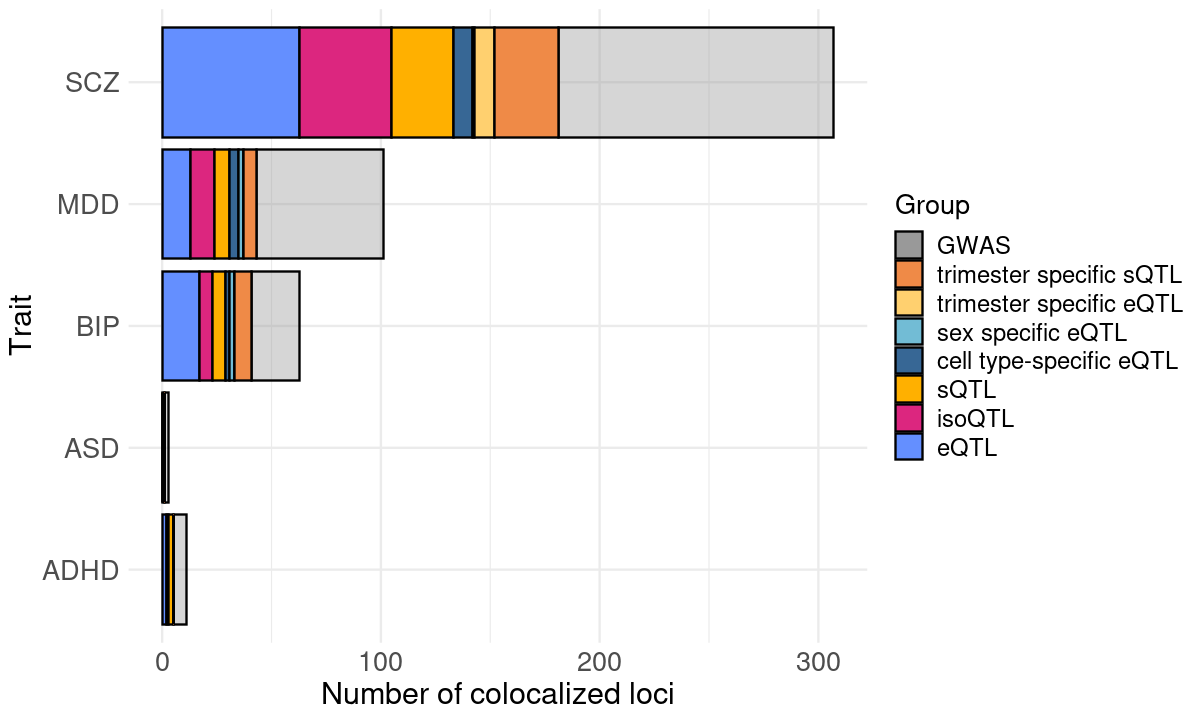

In [4]:
options(repr.plot.height = 6, repr.plot.width = 10)
ggplot(df, aes(y = Trait, x = number, fill = group)) +
    geom_bar(position = "stack", stat = "identity", color = "black", alpha = ifelse(df$group == "GWAS", 0.4, 1)) +
    theme_minimal() + 
    labs(x = "Number of colocalized loci", y = "Trait") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
#     scale_fill_manual(values = c("grey", met.brewer("Tam", 7)), name = "Group")
#      scale_fill_manual(values = c("grey", "#CC79A7", "#56B4E9", "#009E73","#F0E442","#FFB000", "#DC267F", "#648FFF"), name = "Group")
    scale_fill_manual(values = c("#999999", met.brewer("Hiroshige", 4), "#FFB000", "#DC267F", "#648FFF"), name = "Group")


In [5]:
ggsave("../figures/coloc.pdf", height = 6, width = 10)

### Venn diagram of colocalized loci

In [25]:
eqtl <- read.table("../results_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
isoqtl <- read.table("../results_isoqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
sqtl <- read.table("../results_sqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig.txt", header = T)
cell <- read.table("../cell_SCZ_sig.txt", header = T)

In [26]:
eqtl <- unique(eqtl$locus)
isoqtl <- unique(isoqtl$locus)
sqtl <- unique(sqtl$locus)
cell <- unique(cell$locus)

In [5]:
# overlap <- calculate.overlap(x = list("eQTL" = eqtl, "isoQTL" = isoqtl, "sQTL" = sqtl))

In [51]:
length(Reduce(intersect, list(eqtl, isoqtl, sqtl))) #n123
length(Reduce(intersect, list(eqtl, isoqtl, cell))) #n124
length(Reduce(intersect, list(eqtl, cell, sqtl))) #n134
length(Reduce(intersect, list(cell, isoqtl, sqtl))) #n234
length(Reduce(intersect, list(cell, isoqtl, sqtl, eqtl)))

[1] 38

[1] 47

[1] 40

[1] 44

[1] 37

png 
  2

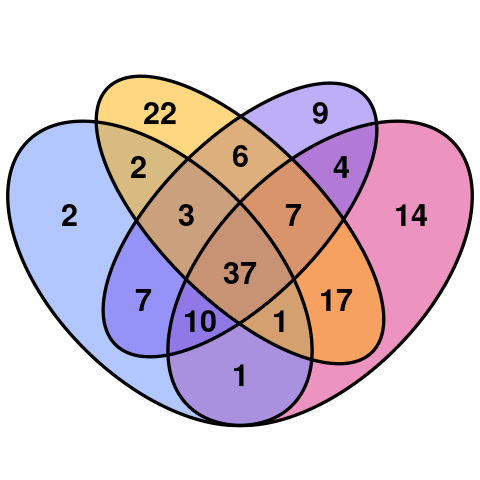

In [55]:
options(repr.plot.height = 4, repr.plot.width = 4)

myCol <- c("#648FFF", "#DC267F", "#FFB000", "#785EF0")
venn.plot <- draw.quad.venn(63, 91, 95, 83, # area1, area2, area3, area4
                              49, 43, 57, # n12, n13, n14
                              62, 58, # n23, n24
                              53, # n34
                              38, 47, 40, 44, #n123, n124, n134, n234
                              37, #n1234
                              fill = myCol,
                              alpha = c(.5,.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = "sans",
                              category = c("", "", "",""),
                              scaled = TRUE)
pdf("../figures/scz_loci.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [29]:
dat <- c(A = 2, B = 14, C = 22, D = 9, 
         "A&B" = 1, "A&C" = 2, "A&D" = 7,
         "B&C" = 17, "B&D" = 4, "C&D" = 6,
         "A&B&C" = 1, "A&B&D" = 10, "A&C&D" = 2, "B&C&D" = 7,
         "A&B&C&D" = 37)

,h,k,a,b,phi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-0.9469283,-1.0830855,3.949038,4.513847,-0.6776347
B,1.5017143,-1.0830855,5.334941,5.310196,-0.4042898
C,0.9794664,1.5771119,5.661628,5.116231,-0.4252971
D,-1.1059949,-0.9213526,4.896327,5.330814,-0.1065760


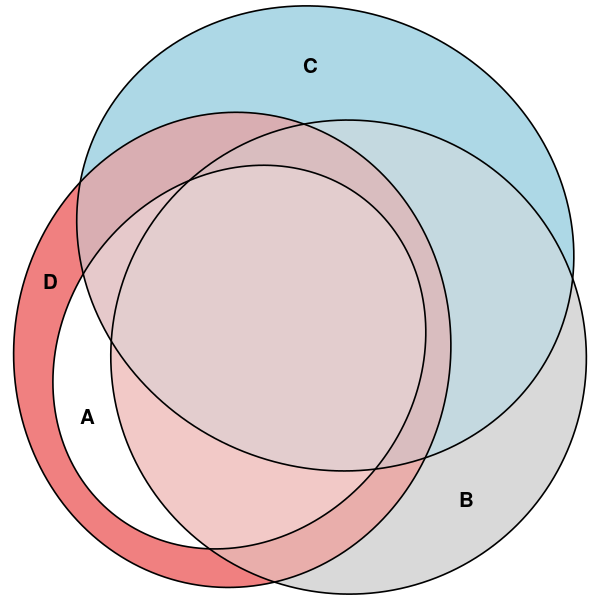

In [30]:
fit <- euler(dat, shape = "ellipse")
plot(fit)
fit

,h,k,a,b,phi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-1.2404963,-1.297013,4.211455,4.211455,-0.1621661
B,1.1671917,-1.297013,5.277967,5.277967,-0.1621661
C,0.9011785,1.288093,5.333219,5.333219,-0.1621661
D,-1.4216039,-1.034452,5.020172,5.020172,-0.1621661


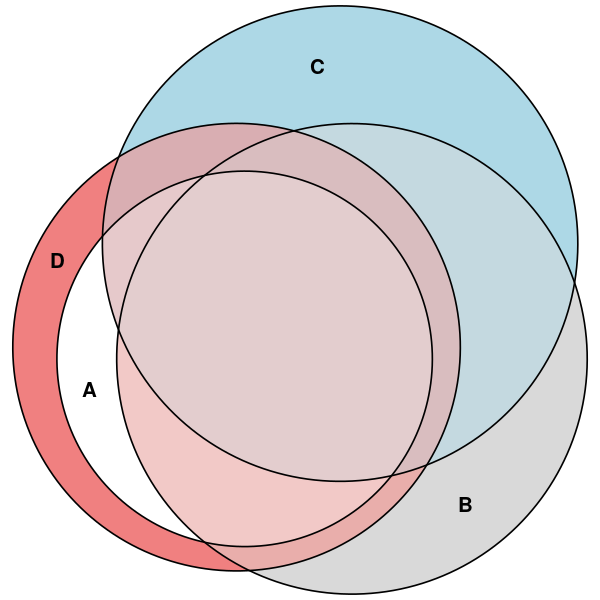

In [23]:
fit1 <- euler(dat)
plot(fit1)
fit1

**Residuals are not small...problematic representation!**

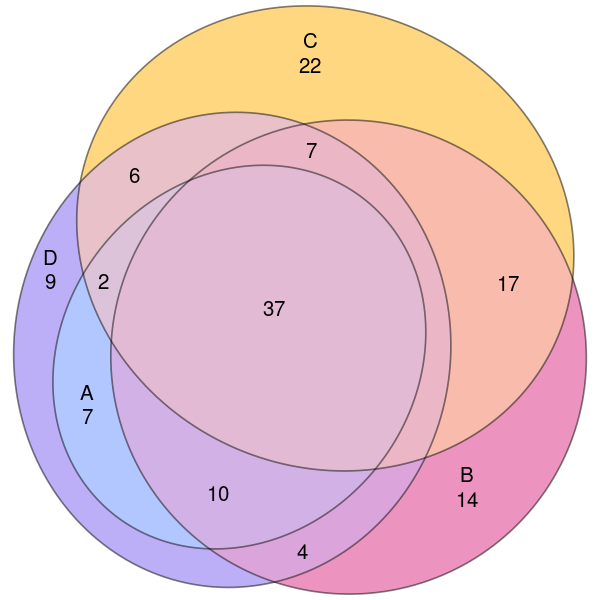

In [31]:
options(repr.plot.height = 5, repr.plot.width = 5)

plot(fit,
     quantities = TRUE,
     fill = c("#648FFF", "#DC267F", "#FFB000", "#785EF0"),
#      labels = c("eQTL", "isoQTL", "sQTL", "cell type-specific eQTL"),
     alpha = 0.5,
#      lty = 1:3,
     labels = list(font = 1))

**temp, for Celine's talk**

In [9]:
snp_set <- fread("../results_isoqtl/PGC3_SCZ_wave3.european.autosome.public.v3/locus_157/ENST00000649633.1_1_gwas_qtl_snp_set.txt", data.table = F, header = F)

In [2]:
gwas <- fread("/u/project/gandalm/shared/GWAS/SCZ.PGC3.2021/wave3_v3/PGC3_SCZ_wave3.european.autosome.public.v3.tsv", data.table = F)
head(gwas)

,CHROM,ID,POS,A1,A2,FCAS,FCON,IMPINFO,BETA,SE,PVAL,NCAS,NCON,NEFF
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,8,rs62513865,101592213,C,T,0.930,0.927,0.963,0.011997738,0.0171,0.4847,53386,77258,58749.13
2,8,rs79643588,106973048,G,A,0.907,0.906,0.997,-0.008596847,0.0148,0.5605,53386,77258,58749.13
3,8,rs17396518,108690829,T,G,0.565,0.566,0.985,-0.002102208,0.0087,0.8145,53386,77258,58749.13
4,8,rs983166,108681675,A,C,0.564,0.563,0.988,0.004897985,0.0087,0.5704,53386,77258,58749.13
5,8,rs28842593,103044620,T,C,0.840,0.840,0.948,-0.003897586,0.0121,0.7488,53386,77258,58749.13
6,8,rs7014597,104152280,G,C,0.841,0.838,0.994,0.007898723,0.0117,0.5034,53386,77258,58749.13


In [12]:
gwas_stats <- snp_set %>% left_join(gwas, by = c("V1" = "ID"))
head(gwas_stats)

,V1,CHROM,POS,A1,A2,FCAS,FCON,IMPINFO,BETA,SE,PVAL,NCAS,NCON,NEFF
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,rs17142837,7,20474717,T,C,0.970,0.971,0.952,-0.017095295,0.0262,0.513800,53386,77258,58749.13
2,rs17142847,7,20475344,G,A,0.924,0.924,0.953,0.003095205,0.0166,0.851600,53386,77258,58749.13
3,rs11979620,7,20476194,T,C,0.889,0.891,0.956,-0.004500110,0.0140,0.748000,53386,77258,58749.13
4,rs17456488,7,20478448,T,C,0.712,0.713,0.960,-0.029995398,0.0097,0.001941,53386,77258,58749.13
5,rs28756922,7,20479039,A,C,0.950,0.950,0.919,0.010801454,0.0207,0.600600,53386,77258,58749.13
6,rs77011193,7,20485611,A,G,0.959,0.959,0.915,-0.017502275,0.0227,0.440000,53386,77258,58749.13


In [13]:
qtl <- fread("../results_isoqtl/PGC3_SCZ_wave3.european.autosome.public.v3/locus_157/ENST00000649633.1_1_all_pairs.txt", header = F, data.table = F)

In [15]:
qtl_stats <- snp_set %>% left_join(qtl, by = c("V1" = "V2"))

In [17]:
colnames(qtl_stats)[7] <- "qtl_npval"

In [22]:
df <- gwas_stats %>% left_join(qtl_stats, by = c("V1")) %>% select(V1, PVAL, qtl_npval)
head(df)

,V1,PVAL,qtl_npval
,<chr>,<dbl>,<dbl>
1,rs17142837,0.513800,0.114111
2,rs17142847,0.851600,0.603635
3,rs11979620,0.748000,0.767330
4,rs17456488,0.001941,0.518962
5,rs28756922,0.600600,0.475261
6,rs77011193,0.440000,0.556301


In [25]:
df %>% arrange(PVAL) %>% head()

,V1,PVAL,qtl_npval
,<chr>,<dbl>,<dbl>
1,rs73060317,2.296e-05,3.47051e-06
2,rs6461564,2.785e-05,9.91900e-05
3,rs6461566,3.105e-05,1.46248e-02
4,rs2282889,3.445e-05,2.99329e-02
5,rs6461563,3.610e-05,5.98804e-03
6,rs6973987,6.478e-05,4.57039e-02


In [29]:
g1 <- subset(df, V1 == "rs73060317")

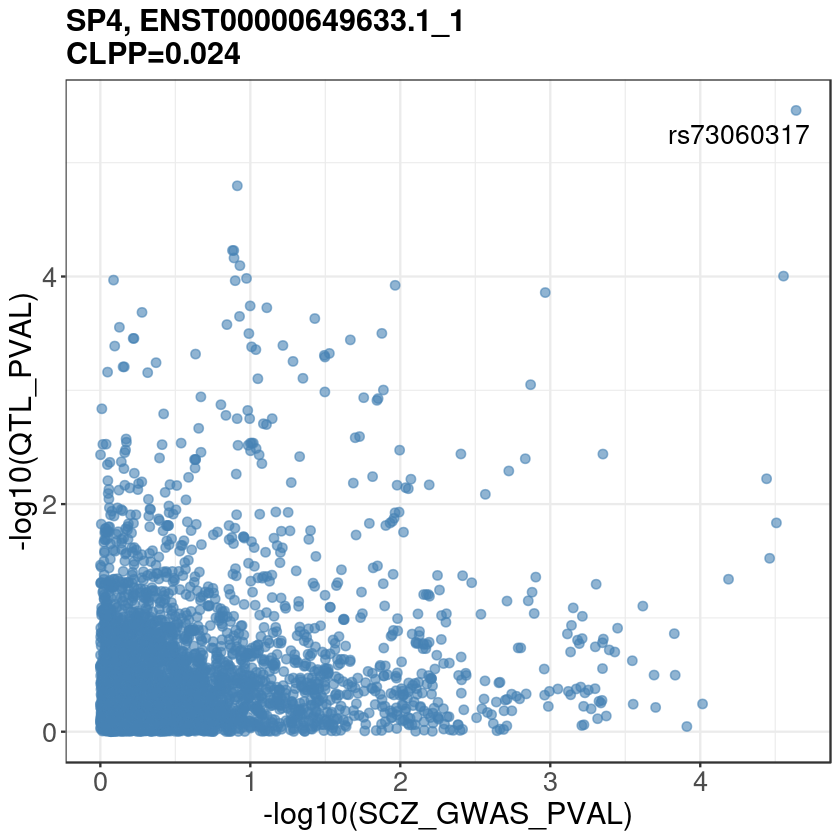

In [52]:
ggplot(df, aes(x = -log10(PVAL), y = -log10(qtl_npval))) +
    geom_point(alpha = 0.6, size = 2, color = "steelblue") +
    theme_bw() + 
    labs(x = "-log10(SCZ_GWAS_PVAL)", y = "-log10(QTL_PVAL)", title = "SP4, ENST00000649633.1_1\nCLPP=0.024") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold")) +
#     geom_text(data = g1, label = "rs73060317", aes(x = -log10(PVAL)-0.4, y = -log10(qtl_npval)-0.2), size = 5)
        geom_text(data = g1, label = "rs73060317", vjust = 1.7, hjust = 0.9, size = 5.5, color = "black")

In [53]:
eur_ld <- fread("../results_isoqtl/PGC3_SCZ_wave3.european.autosome.public.v3/locus_157/ENST00000649633.1_1_1kg_eur.ld", header = F, data.table = F)
head(eur_ld)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V3763,V3764,V3765,V3766,V3767,V3768,V3769,V3770,V3771,V3772
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.00000000,-0.0324421,0.3751320,-0.0830978,0.00850978,-0.0135223,0.1368290,-0.0398127,-0.0885803,-0.0875033,...,-0.01597360,-0.04919360,0.00302903,-0.01037910,-0.0357726,0.00120305,0.00120305,0.00302903,0.05431190,-0.0296557
2,-0.03244210,1.0000000,0.8775570,-0.2013420,0.70182400,-0.0279075,-0.0486125,0.1673330,-0.0714036,-0.0571199,...,-0.03710610,0.00824275,-0.03809670,0.02832540,-0.0333791,0.03975370,-0.04183160,-0.03809670,0.05478400,0.0339214
3,0.37513200,0.8775570,1.0000000,-0.2486830,0.64302600,-0.0199156,0.0251854,0.1344880,-0.1126010,-0.1080360,...,-0.01107300,-0.01826710,-0.00581818,-0.00490065,-0.0524346,0.00971037,-0.01032490,-0.00581818,0.06654650,0.0150579
4,-0.08309780,-0.2013420,-0.2486830,1.0000000,-0.17063500,0.2264870,-0.0793391,-0.1006420,0.2582790,0.1820340,...,0.00186153,-0.00325475,0.00963188,0.00554763,-0.0310653,-0.02157650,0.01471210,0.00963188,0.06406100,-0.0373761
5,0.00850978,0.7018240,0.6430260,-0.1706350,1.00000000,-0.0140475,-0.0604507,-0.0404511,0.0599128,0.0835322,...,-0.04433900,-0.00117166,-0.03654980,0.01020350,-0.0328834,0.04339750,-0.03933690,-0.03654980,0.00952945,0.0890052
6,-0.01352230,-0.0279075,-0.0199156,0.2264870,-0.01404750,1.0000000,0.2652120,-0.0756889,0.2084360,-0.1803090,...,-0.02303450,0.05339500,-0.05496370,0.03240430,0.0423634,0.06064710,-0.05717740,-0.05496370,0.01729620,-0.0427646


In [54]:
which(snp_set$V1 == "rs73060317")

[1] 1782

In [58]:
eur_ld[1782,1:3]

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1782,0.0623831,0.0126941,0.0322816


In [59]:
eur_ld[1:3,1782]

[1] 0.0623831 0.0126941 0.0322816

In [60]:
df <- cbind(df, eur_ld[,1782])

In [61]:
head(df)

,V1,PVAL,qtl_npval,"eur_ld[, 1782]"
,<chr>,<dbl>,<dbl>,<dbl>
1,rs17142837,0.513800,0.114111,0.06238310
2,rs17142847,0.851600,0.603635,0.01269410
3,rs11979620,0.748000,0.767330,0.03228160
4,rs17456488,0.001941,0.518962,0.00794554
5,rs28756922,0.600600,0.475261,-0.04874460
6,rs77011193,0.440000,0.556301,0.06427870


In [64]:
colnames(df)[4] <- "EUR_LD"

In [68]:
range(df$EUR_LD)

[1] -0.542144  1.000000

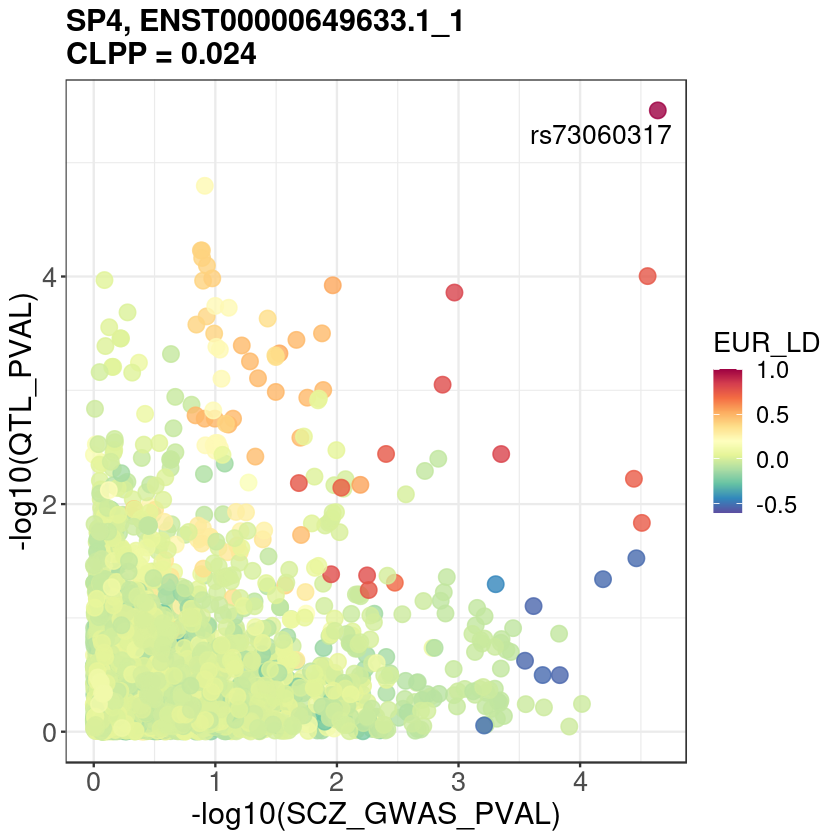

In [76]:
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")))

ggplot(df, aes(x = -log10(PVAL), y = -log10(qtl_npval))) +
    geom_point(alpha = 0.8, size = 4, aes(color = EUR_LD)) +
    theme_bw() + 
    labs(x = "-log10(SCZ_GWAS_PVAL)", y = "-log10(QTL_PVAL)", title = "SP4, ENST00000649633.1_1\nCLPP = 0.024") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
#     geom_text(data = g1, label = "rs73060317", aes(x = -log10(PVAL)-0.4, y = -log10(qtl_npval)-0.2), size = 5)
        geom_text(data = g1, label = "rs73060317", vjust = 1.7, hjust = 0.9, size = 5.5, color = "black") +
    scale_colour_gradientn(colours = myPalette(100), limits=c(-0.6, 1))

In [77]:
ggsave("../figures/temp.pdf", height = 6, width = 6)

**SCZ, locus232, XKR6**

In [33]:
snp_set <- fread("../results_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/locus_232/ENSG00000171044_gwas_eqtl_snp_set.txt", data.table = F, header = F)

In [35]:
gwas_stats <- snp_set %>% left_join(gwas, by = c("V1" = "ID"))

In [37]:
qtl <- fread("../results_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/locus_232/ENSG00000171044_all_pairs.txt", header = F, data.table = F)

In [38]:
eur_ld <- fread("../results_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/locus_232/ENSG00000171044_1kg_eur.ld", header = F, data.table = F)

In [39]:
which(snp_set$V1 == "rs2975648")

[1] 198

In [40]:
qtl_stats <- snp_set %>% left_join(qtl, by = c("V1" = "V2"))
colnames(qtl_stats)[7] <- "qtl_npval"
df <- gwas_stats %>% left_join(qtl_stats, by = c("V1")) %>% select(V1, PVAL, qtl_npval)
df <- cbind(df, eur_ld[,198])

In [41]:
colnames(df)[4] <- "EUR_LD"

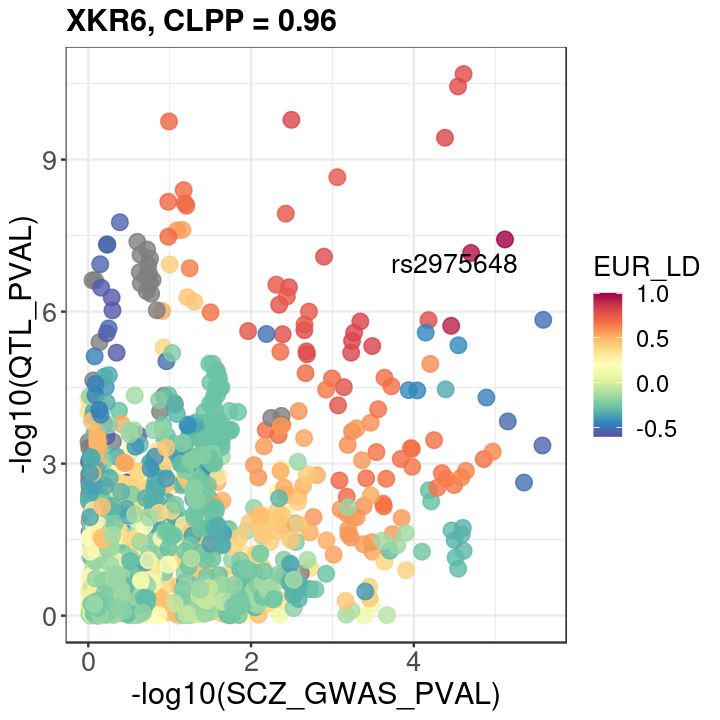

In [44]:
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")))
g1 <- subset(df, V1 == "rs2975648")
options(repr.plot.height = 6, repr.plot.width = 6)
ggplot(df, aes(x = -log10(PVAL), y = -log10(qtl_npval))) +
    geom_point(alpha = 0.8, size = 4, aes(color = EUR_LD)) +
    theme_bw() + 
    labs(x = "-log10(SCZ_GWAS_PVAL)", y = "-log10(QTL_PVAL)", title = "XKR6, CLPP = 0.96") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
#     geom_text(data = g1, label = "rs73060317", aes(x = -log10(PVAL)-0.4, y = -log10(qtl_npval)-0.2), size = 5)
        geom_text(data = g1, label = "rs2975648", vjust = 1.7, hjust = 0.9, size = 5.5, color = "black") +
    scale_colour_gradientn(colours = myPalette(100), limits=c(-0.6, 1))

### CLPP results (PGC2)
- 29 out of 142 loci got target gene (CLPP > 0.01); all together 57 genes
- see spreadsheet

In [3]:
dat <- read.table("~/project-gandalm/isoform_twas/colocal/results_eqtl/SCZ.Clozuk.2018/CLPP_sig.txt", header = T, stringsAsFactors = F)
head(dat)

,SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene
,<chr>,<dbl>,<dbl>,<int>,<chr>
1,rs11809140,0.648496,0.0101389,108,ENSG00000227740
2,rs6769789,0.999854,0.4698030,113,ENSG00000010327
3,rs6769789,0.793690,0.0284297,113,ENSG00000114904
4,rs6769789,0.747008,0.0602283,113,ENSG00000163935
5,rs6445541,0.130895,0.0105536,113,ENSG00000163935
6,rs6769789,0.999465,0.4444930,113,ENSG00000163938


In [4]:
length(unique(dat$locus))
dim(dat)
length(unique(dat$gene))

[1] 29

[1] 95  5

[1] 57

### Product of PIPs
"Quick and dirty analysis"
- PGC3 SCZ
- product of SuSiE PIP and GWAS FINEMAP

GWAS 
- 233 analysed regions, 233 index SNP
- <=3 causals
- <=5 SNP in CS
- VEP annotation
- no xMHC
- 232 loci have > 0.01 PIP variants

Fetal eQTL susie
- variant_id: chr_pos_ref_alt
- 2358/122050 susie variants exactly matched to FINEMAP variant_id
- used data BIM, mapped to rsID, 2103/122050 matched to FIENMAP rsID 
- difference imputation reference to GWAS, ancestry difference etc.

Use GENCODE annotation for genes
- 8 genes colocalized with CLPP > 0.01; same results matching with variant_id or rsID

Evaluate finemapping methods. eCAVIAR was run on common variants only. Are PIPs concordant?
- concordance of CAVIAR and FINEMAP
- concordance of CAVIAR and susie
- bad concordance. Could run susie on the common variants only
- this naive approach (product of PIPs) gave less significant colocalization than eCAVIAR, which makes sense due to the set of SNPs issue...
- could run coloc framework

In [2]:
# k <= 3.5
# finemap.1 <- read_xlsx('/u/project/gandalm/shared/GWAS/SCZ.PGC3.2021/tables/Supplementary Table 11 - FINEMAP.xlsx',sheet = 2)
# all 95% CS
finemap.2 <- read_xlsx('/u/project/gandalm/shared/GWAS/SCZ.PGC3.2021/tables/Supplementary Table 11 - FINEMAP.xlsx',sheet = 3)
# CS size <= 5 SNP
# finemap.3 <- read_xlsx('/u/project/gandalm/shared/GWAS/SCZ.PGC3.2021/tables/Supplementary Table 11 - FINEMAP.xlsx',sheet = 4)

In [3]:
# dim(finemap.1)
dim(finemap.2)
# dim(finemap.3)

[1] 24429    22

In [4]:
# finemap = rbind(finemap.1, finemap.2, finemap.3)
# finemap.2 should contain everything
finemap <- finemap.2

In [25]:
length(unique(finemap$index.snp[finemap$finemap_posterior_probability>.01]))

[1] 232

In [22]:
head(finemap)

index.snp,expected.causals_k,rsid,chromosome,position,reference_allele,other_allele,maf,or,se,...,gene.symbol,gene.hgnc,gene.ensembl,transcript/feature,canonical_transcript,ensembl_gene_classification,impact,sift,polyphen,cadd
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
rs6673880,1.09579,rs2494638,1,2372133,G,C,0.339,0.93277,0.0098,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,1.565
rs6673880,1.09579,rs6688934,1,2372397,A,G,0.427,0.94101,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,2.850
rs6673880,1.09579,rs6673661,1,2372954,A,G,0.427,0.94092,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,0.166
rs6673880,1.09579,rs6673880,1,2373168,A,G,0.427,0.94082,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,1.358
rs6673880,1.09579,rs4648844,1,2374758,A,G,0.427,0.94158,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,7.589
rs6673880,1.09579,rs6687012,1,2375844,T,G,0.427,0.94205,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,3.410


In [26]:
finemap %>% group_by(index.snp) %>% filter(finemap_posterior_probability > 0.01) %>% summarise(n=n()) %>% View()

index.snp,n
<chr>,<int>
8:4180090_T_A,3
rs10035564,7
rs10069930,3
rs10086619,24
rs10117,45
rs10127983,34
rs10148671,9
rs10238960,25
rs10243922,5


In [5]:
finemap$variant_id <- paste0("chr", finemap$chromosome, "_", finemap$position, "_", finemap$reference_allele, "_", finemap$other_allele)

In [6]:
finemap <- finemap %>% select(index.snp, expected.causals_k, rsid,pval,finemap_posterior_probability,variant_id)

In [62]:
# finemap$variant2 <- paste0("chr", finemap$chromosome, "_", finemap$position, "_", finemap$other_allele, "_", finemap$reference_allele)

**1: eQTL**

In [39]:
fetal_eqtl <- fread("~/project-gandalm/isoform_twas/eqtl_new/results/susie_finemap/mixed/mixed_ciseqtl_90hcp_perm_purity_filtered.txt.gz", data.table = F)

In [31]:
head(fetal_eqtl)

,phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000166024,chr10_100003785_T_C,10,100003785,T,C,ENSG00000166024_L1,L1,chr10:98894380-100894380,0.068322868,-6.900330,0.8706241,0.9776713,24,-0.012146753,0.04585326,6.840422
2,ENSG00000166024,chr10_100008436_G_A,10,100008436,G,A,ENSG00000166024_L1,L1,chr10:98894380-100894380,0.021124867,-6.704314,0.8706241,0.9776713,24,-0.003453998,0.02464589,6.840422
3,ENSG00000166024,chr10_100011970_G_A,10,100011970,G,A,ENSG00000166024_L1,L1,chr10:98894380-100894380,0.021124867,-6.704314,0.8706241,0.9776713,24,-0.003453998,0.02464589,6.840422
4,ENSG00000166024,chr10_100013244_A_C,10,100013244,A,C,ENSG00000166024_L1,L1,chr10:98894380-100894380,0.050424642,-6.848917,0.8706241,0.9776713,24,-0.008776639,0.03908357,6.840422
5,ENSG00000119943,chr10_100164441_T_C,10,100164441,T,C,ENSG00000119943_L1,L1,chr10:99174938-101174938,0.008835407,7.490109,0.6954467,0.9374778,42,0.002248738,0.02611878,9.666004
6,ENSG00000119943,chr10_100164442_A_G,10,100164442,A,G,ENSG00000119943_L1,L1,chr10:99174938-101174938,0.008835407,7.490109,0.6954467,0.9374778,42,0.002248738,0.02611878,9.666004


In [40]:
fetal_eqtl <- fetal_eqtl %>% dplyr::select(phenotype_id, variant_id, pip)

In [7]:
# mart = useMart("ENSEMBL_MART_ENSEMBL", "hsapiens_gene_ensembl")
# meta = getBM(attributes = c("ensembl_gene_id", "external_gene_name"),mart=mart)
# head(meta)

In [35]:
# fetal_eqtl <- fetal_eqtl %>% left_join(meta, by=c('phenotype_id' = 'ensembl_gene_id'))

In [9]:
# idx = which(fetal_eqtl$external_gene_name=="")
# length(idx)

In [38]:
# fetal_eqtl$external_gene_name[idx] = fetal_eqtl$phenotype_id[idx]
# table(fetal_eqtl$variant_id %in% finemap$variant_id)
# table(fetal_eqtl$variant_id %in% finemap$variant2)

In [9]:
gencode <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [10]:
gencode <- gencode %>% dplyr::select(ensg, V12)

In [41]:
fetal_eqtl <- fetal_eqtl %>% left_join(gencode, by = c("phenotype_id" = "ensg"))

In [13]:
head(fetal_eqtl)

,phenotype_id,variant_id,pip,V12
,<chr>,<chr>,<dbl>,<chr>
1,ENSG00000166024,chr10_100003785_T_C,0.068322868,R3HCC1L
2,ENSG00000166024,chr10_100008436_G_A,0.021124867,R3HCC1L
3,ENSG00000166024,chr10_100011970_G_A,0.021124867,R3HCC1L
4,ENSG00000166024,chr10_100013244_A_C,0.050424642,R3HCC1L
5,ENSG00000119943,chr10_100164441_T_C,0.008835407,PYROXD2
6,ENSG00000119943,chr10_100164442_A_G,0.008835407,PYROXD2


In [14]:
head(finemap)
dim(finemap)

index.snp,expected.causals_k,rsid,pval,finemap_posterior_probability,variant_id
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
rs6673880,1.09579,rs2494638,1.232404e-12,0.2153220,chr1_2372133_G_C
rs6673880,1.09579,rs6688934,1.550007e-12,0.1718370,chr1_2372397_A_G
rs6673880,1.09579,rs6673661,1.430456e-12,0.1860460,chr1_2372954_A_G
rs6673880,1.09579,rs6673880,1.308376e-12,0.2032390,chr1_2373168_A_G
rs6673880,1.09579,rs4648844,2.568226e-12,0.1044400,chr1_2374758_A_G
rs6673880,1.09579,rs6687012,3.879582e-12,0.0697641,chr1_2375844_T_G


[1] 24429     6

In [15]:
sum(unique(fetal_eqtl$variant_id) %in% unique(finemap$variant_id))
length(unique(fetal_eqtl$variant_id))
length(unique(finemap$variant_id))

[1] 2358

[1] 122050

[1] 24429

In [42]:
fetal_finemap <- fetal_eqtl %>% inner_join(finemap, by="variant_id")
fetal_finemap$clpp <- as.numeric(fetal_finemap$finemap_posterior_probability * fetal_finemap$pip)
cat(paste(sort(unique(fetal_finemap$V12[fetal_finemap$clpp>.01]))),sep='\n')

AC013391.3
AL138976.2
EIF5
PRKD3
SDAD1P1
SLC9C2
Z95118.2
ZNF835


**2: Match to rsID**

In [23]:
bim <- fread("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.removeGeneOutlier.bim", data.table = F)
head(bim)

,V1,V2,V3,V4,V5,V6
,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,1,rs61769339,0,662622,A,G
2,1,rs200188737,0,666249,T,C
3,1,rs12238997,0,693731,G,A
4,1,rs61769351,0,693823,C,G
5,1,rs142559957,0,704637,A,G
6,1,rs142576295,0,708075,G,A


In [24]:
bim$variant_id <- paste0("chr", bim$V1, "_", bim$V4, "_", bim$V6, "_", bim$V5)

In [61]:
sum(unique(fetal_eqtl$variant_id) %in% bim$variant_id)

[1] 121859

In [63]:
which(!unique(fetal_eqtl$variant_id) %in% bim$variant_id)

[1]    706   1234   1246   1247   1248   1249   1250   1251   1252   1253
 [11]   1493   1975   1977   2005   2030   2034   2061   2070   2071   2072
 [21]   2075   3176   7136  10406  10407  10525  18026  18027  18028  18029
 [31]  18030  18031  21513  21514  21515  21516  21517  21518  21536  23833
 [41]  23835  23836  23837  23839  23840  24513  24514  25210  25211  26022
 [51]  27058  31284  31287  32711  32713  32819  32824  32825  33250  38611
 [61]  38651  40533  40535  40971  40988  45299  45619  46041  47769  50810
 [71]  51546  52177  52691  52697  53812  54224  55764  55765  55766  55768
 [81]  55769  55771  55772  55773  55774  55775  55776  55778  55779  55780
 [91]  55781  55782  55783  55784  55787  63431  67531  67532  67537  67538
[101]  68197  68198  68199  68200  68201  71804  71819  72400  73649  73652
[111]  74457  75284  76685  77325  77795  79104  79105  79106  79107  79779
[121]  80929  80931  83121  86026  86034  86146  88311  88314  88319  88333
[131]  88334  90488  91426  91427  95559  95560  95561  95562  95563  95564
[141]  95566  96166  98067  98201  98202  98203  98205  98206  98207  99731
[151] 100363 100366 100372 101282 104630 104632 104844 108113 108144 108658
[161] 109133 109134 109135 109395 109396 109399 110690 110691 110692 110693
[171] 110694 110695 113145 113238 113239 115296 115298 115305 116221 117957
[181] 117960 117964 117965 117967 117968 117969 118057 118058 119375 119826
[191] 120008

In [66]:
unique(fetal_eqtl$variant_id)[706]

[1] "chr10_11813840_G_T"

In [67]:
fetal_eqtl %>% filter(variant_id == "chr10_11813840_G_T")

phenotype_id,variant_id,pip,external_gene_name,V12
<chr>,<chr>,<dbl>,<chr>,<chr>
ENSG00000134463,chr10_11813840_G_T,0.9983873,ECHDC3,ECHDC3


In [68]:
bim %>% filter(V1 == 10, V4 == 11813840)

V1,V2,V3,V4,V5,V6,variant_id
<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
10,rs10906012,0,11813840,G,T,chr10_11813840_T_G


In [25]:
# somehow some variants have REF as alelle1 in BIM, ALT as allele2 
# fix variant_id in BIM file for these

to_fix <- c(unique(fetal_eqtl$variant_id)[which(!unique(fetal_eqtl$variant_id) %in% bim$variant_id)])
for (id in to_fix) {
    chr <- as.numeric(gsub("chr","",strsplit(id, split = "_")[[1]][1]))
    pos <- strsplit(id, split = "_")[[1]][2]
    bim[(bim$V1 == chr & bim$V4 == pos), 'variant_id'] <- id
}

In [100]:
bim %>% filter(V1 == 10, V4 == 11813840)

V1,V2,V3,V4,V5,V6,variant_id
<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
10,rs10906012,0,11813840,G,T,chr10_11813840_G_T


In [101]:
sum(unique(fetal_eqtl$variant_id) %in% bim$variant_id)

[1] 122050

In [26]:
fetal_eqtl <- fetal_eqtl %>% left_join(bim, by = "variant_id")

In [103]:
head(fetal_eqtl)

,phenotype_id,variant_id,pip,external_gene_name,V12,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,ENSG00000166024,chr10_100003785_T_C,0.068322868,R3HCC1L,R3HCC1L,10,rs1359508,0,100003785,C,T
2,ENSG00000166024,chr10_100008436_G_A,0.021124867,R3HCC1L,R3HCC1L,10,rs3793692,0,100008436,A,G
3,ENSG00000166024,chr10_100011970_G_A,0.021124867,R3HCC1L,R3HCC1L,10,rs3750598,0,100011970,A,G
4,ENSG00000166024,chr10_100013244_A_C,0.050424642,R3HCC1L,R3HCC1L,10,rs3750599,0,100013244,C,A
5,ENSG00000119943,chr10_100164441_T_C,0.008835407,PYROXD2,PYROXD2,10,rs7915108,0,100164441,C,T
6,ENSG00000119943,chr10_100164442_A_G,0.008835407,PYROXD2,PYROXD2,10,chr10:98404685,0,100164442,G,A


In [104]:
length(unique(fetal_eqtl$V2))

[1] 122050

In [105]:
sum(unique(fetal_eqtl$V2) %in% unique(finemap$rsid))

[1] 2103

In [106]:
length(unique(finemap$rsid))

[1] 24429

In [108]:
fetal_finemap2 <- fetal_eqtl %>% inner_join(finemap, by=c("V2" = "rsid"))
fetal_finemap2$clpp = as.numeric(fetal_finemap2$finemap_posterior_probability * fetal_finemap2$pip)
cat(paste(sort(unique(fetal_finemap2$external_gene_name[fetal_finemap2$clpp>.01]))),sep='\n')

EIF5
ENSG00000259775
ENSG00000261478
ENSG00000286511
PRKD3
SDAD1P1
SLC9C2
ZNF835


In [110]:
cat(paste(sort(unique(fetal_finemap2$V12[fetal_finemap2$clpp>.01]))),sep='\n')

AC013391.3
AL138976.2
EIF5
PRKD3
SDAD1P1
SLC9C2
Z95118.2
ZNF835


**3: CAVIAR-PGC3 FINEMAP**
- PGC2 locus 113, in PGC3 ST3, corresponds to the locus with rs2710323 as index snp
- PGC3 FINEMAP finds 5 causals (eCAVIAR 2 max)
- most of the shared SNPs between PGC2 and eQTL (917 total) are not in PGC3 FINEMAP CS (only 8 common), for the commons ones, PIPs are not concordant

In [112]:
head(finemap.2)

index.snp,expected.causals_k,rsid,chromosome,position,reference_allele,other_allele,maf,or,se,...,gene.symbol,gene.hgnc,gene.ensembl,transcript/feature,canonical_transcript,ensembl_gene_classification,impact,sift,polyphen,cadd
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
rs6673880,1.09579,rs2494638,1,2372133,G,C,0.339,0.93277,0.0098,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,1.565
rs6673880,1.09579,rs6688934,1,2372397,A,G,0.427,0.94101,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,2.850
rs6673880,1.09579,rs6673661,1,2372954,A,G,0.427,0.94092,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,0.166
rs6673880,1.09579,rs6673880,1,2373168,A,G,0.427,0.94082,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,1.358
rs6673880,1.09579,rs4648844,1,2374758,A,G,0.427,0.94158,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,7.589
rs6673880,1.09579,rs6687012,1,2375844,T,G,0.427,0.94205,0.0086,...,PLCH2,29037,ENSG00000149527,ENST00000609981.1,-,protein_coding,intron_variant,-,-,3.410


In [6]:
finemap.2 %>% 
    filter(chromosome == 3, index.snp == "rs2710323") %>% 
    dplyr::select(index.snp, expected.causals_k, rsid,pval,finemap_posterior_probability) %>%
    filter(rsid == "rs6769789")

index.snp,expected.causals_k,rsid,pval,finemap_posterior_probability
<chr>,<dbl>,<chr>,<dbl>,<dbl>
rs2710323,5.000744,rs6769789,1.399227e-18,0.00295357


In [9]:
locus_finemap <- finemap.2 %>% 
    filter(chromosome == 3, index.snp == "rs2710323") %>% 
    dplyr::select(index.snp, expected.causals_k, rsid,pval,finemap_posterior_probability)

In [8]:
locus_caviar <- fread("~/project-gandalm/isoform_twas/colocal/results_eqtl/SCZ.Clozuk.2018/locus_113/ENSG00000010327_ecaviar_1_post", data.table = F)
head(locus_caviar)

,SNP_ID,Prob_in_pCausalSet,Causal_Post._Prob.
,<chr>,<dbl>,<dbl>
1,rs143380194,1.62597e-26,3.25194e-26
2,rs17052201,3.22563e-26,6.45126e-26
3,rs11710485,1.57354e-26,3.14709e-26
4,rs67749743,3.87441e-26,7.74883e-26
5,rs148275756,2.27911e-25,4.55822e-25
6,rs731831,2.09339e-17,4.18678e-17


In [10]:
finemap_caviar <- locus_caviar %>% inner_join(locus_finemap, by = c("SNP_ID" = "rsid"))
dim(finemap_caviar)

[1] 8 7

In [11]:
dim(locus_caviar)

[1] 917   3

In [12]:
head(finemap_caviar)

,SNP_ID,Prob_in_pCausalSet,Causal_Post._Prob.,index.snp,expected.causals_k,pval,finemap_posterior_probability
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,rs7612511,0.000034356,0.000068712,rs2710323,5.000744,4.731274e-21,0.03330560
2,rs2256332,0.019710200,0.039420400,rs2710323,5.000744,8.907632e-20,0.04639940
3,rs2245647,0.007327260,0.014654500,rs2710323,5.000744,1.249005e-18,0.00329230
4,rs3774364,0.046742100,0.093484100,rs2710323,5.000744,1.112344e-18,0.00313730
5,rs2071042,0.010290200,0.020580500,rs2710323,5.000744,8.910963e-19,0.00449921
6,rs6769789,0.234902000,0.469803000,rs2710323,5.000744,1.399227e-18,0.00295357


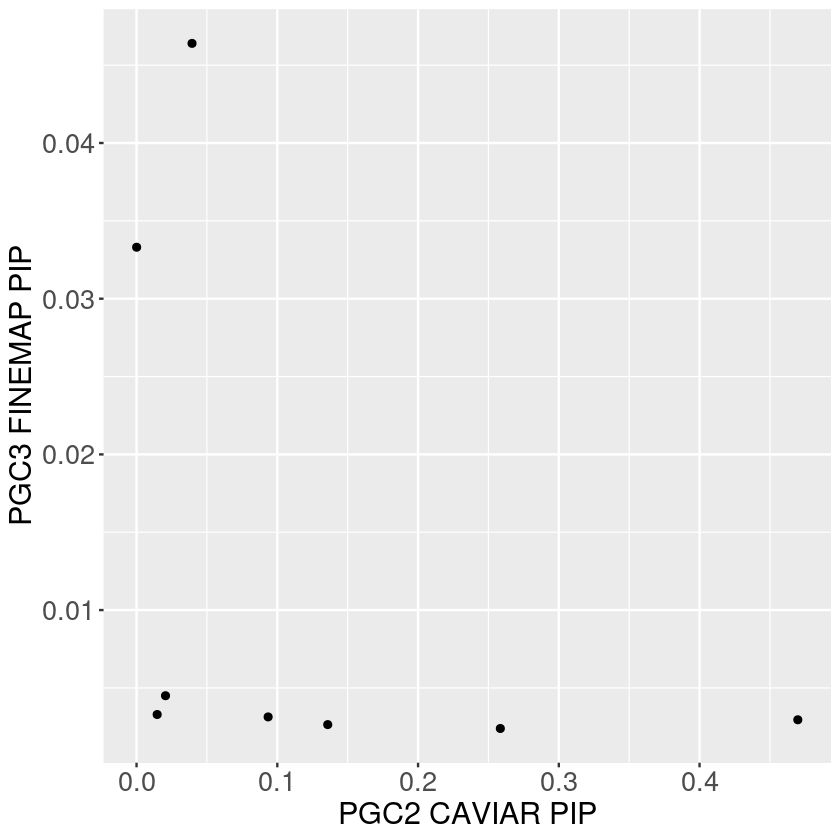

In [34]:
ggplot(finemap_caviar, aes(x = Causal_Post._Prob., y = finemap_posterior_probability)) +
    geom_point() +
    labs(x = "PGC2 CAVIAR PIP", y = "PGC3 FINEMAP PIP") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18))

In [14]:
finemap_caviar2 <- locus_caviar %>% inner_join(finemap.2, by = c("SNP_ID" = "rsid"))
dim(finemap_caviar2)

[1]  8 24

**4: CAVIAR-fetal SuSiE**
- gene has 3439 cis variants, only 917 shared with GWAS, run CAVIAR, and tested for colocalization

In [27]:
dim(fetal_eqtl)
head(fetal_eqtl)

[1] 161929      9

,phenotype_id,variant_id,pip,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,ENSG00000166024,chr10_100003785_T_C,0.068322868,10,rs1359508,0,100003785,C,T
2,ENSG00000166024,chr10_100008436_G_A,0.021124867,10,rs3793692,0,100008436,A,G
3,ENSG00000166024,chr10_100011970_G_A,0.021124867,10,rs3750598,0,100011970,A,G
4,ENSG00000166024,chr10_100013244_A_C,0.050424642,10,rs3750599,0,100013244,C,A
5,ENSG00000119943,chr10_100164441_T_C,0.008835407,10,rs7915108,0,100164441,C,T
6,ENSG00000119943,chr10_100164442_A_G,0.008835407,10,chr10:98404685,0,100164442,G,A


In [18]:
eqtl_caviar <- fread("~/project-gandalm/isoform_twas/colocal/results_eqtl/SCZ.Clozuk.2018/locus_113/ENSG00000010327_ecaviar_2_post", data.table = F)
head(eqtl_caviar)

,SNP_ID,Prob_in_pCausalSet,Causal_Post._Prob.
,<chr>,<dbl>,<dbl>
1,rs143380194,6.50232e-17,1.30046e-16
2,rs17052201,8.19374e-17,1.63875e-16
3,rs11710485,6.11851e-17,1.22370e-16
4,rs67749743,1.04970e-16,2.09940e-16
5,rs148275756,1.11294e-16,2.22589e-16
6,rs731831,7.43815e-15,1.48763e-14


In [36]:
eqtl_susie <- fetal_eqtl %>% filter(phenotype_id == "ENSG00000010327")
eqtl_susie

phenotype_id,variant_id,pip,V1,V2,V3,V4,V5,V6
<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<chr>,<chr>
ENSG00000010327,chr3_52567779_G_A,0.7851372,3,rs112562394,0,52567779,A,G
ENSG00000010327,chr3_52687566_T_C,0.2165387,3,rs7612511,0,52687566,C,T


In [37]:
susie_caviar <- eqtl_caviar %>% inner_join(eqtl_susie, by = c("SNP_ID" = "V2"))
dim(susie_caviar)

[1]  1 11

In [42]:
finemap.2 %>% filter(rsid == "rs7612511") %>% dplyr::select(finemap_posterior_probability)

finemap_posterior_probability
<dbl>
0.0333056


In [38]:
susie_caviar

SNP_ID,Prob_in_pCausalSet,Causal_Post._Prob.,phenotype_id,variant_id,pip,V1,V3,V4,V5,V6
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
rs7612511,0.499998,0.999996,ENSG00000010327,chr3_52687566_T_C,0.2165387,3,0,52687566,C,T


[1] 97 11

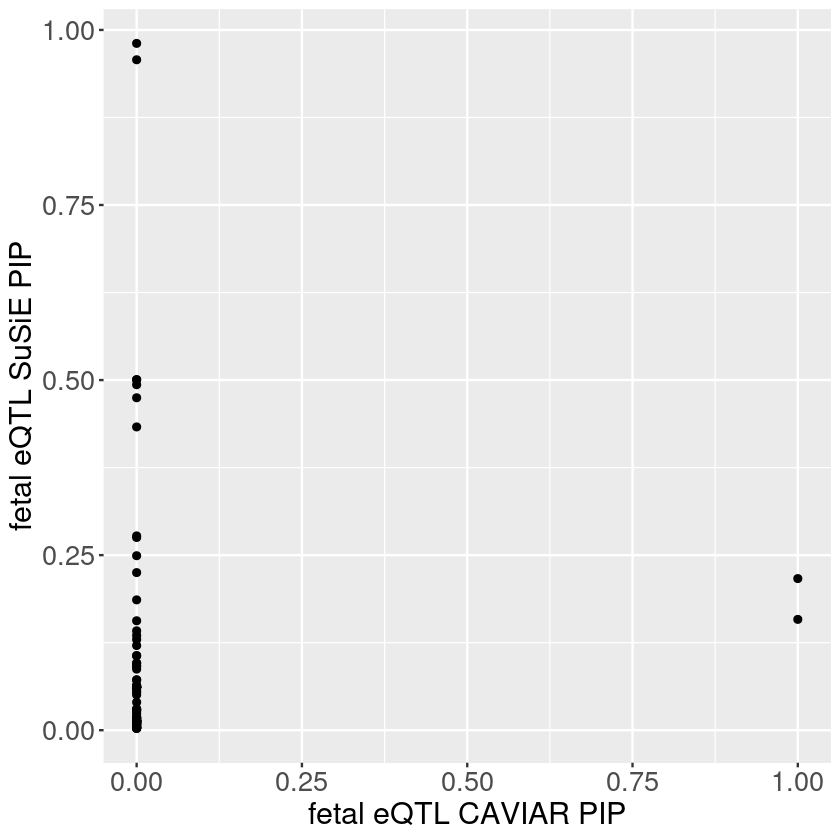

In [39]:
susie_caviar2 <- eqtl_caviar %>% inner_join(fetal_eqtl, by = c("SNP_ID" = "V2"))
dim(susie_caviar2)

ggplot(susie_caviar2, aes(x = Causal_Post._Prob., y = pip)) +
    geom_point() +
    labs(x = "fetal eQTL CAVIAR PIP", y = "fetal eQTL SuSiE PIP") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18))

**5: isoQTL**
- 2913/225218 susie variants are matched to GWAS FINEMAP
- mapped Tx to Genes
- 21 genes have CLPP > 0.01 variants

In [43]:
fetal_isoqtl <- fread("~/project-gandalm/isoform_twas/isoqtl_new/results/susie_finemap/mixed_cisisoqtl_70hcp_perm_purity_filtered.txt.gz", data.table = F)

In [44]:
fetal_isoqtl <- fetal_isoqtl %>% dplyr::select(phenotype_id, variant_id, pip)

In [45]:
tx2gene <- read.table("~/project-gandalm/isoform_twas/salmon/tx2gene_gencode_v33_noGeneVersion.tsv", header = T)

In [46]:
fetal_isoqtl <- fetal_isoqtl %>% left_join(tx2gene, by = c("phenotype_id" = "Tx"))

In [47]:
fetal_isoqtl <- fetal_isoqtl %>% left_join(gencode, by = c("Gene" = "ensg"))

In [48]:
sum(unique(fetal_isoqtl$variant_id) %in% unique(finemap$variant_id))
length(unique(fetal_isoqtl$variant_id))

[1] 2913

[1] 225218

In [49]:
fetal_isoqtl_finemap <- fetal_isoqtl %>% inner_join(finemap, by="variant_id")
fetal_isoqtl_finemap$clpp <- as.numeric(fetal_isoqtl_finemap$finemap_posterior_probability * fetal_isoqtl_finemap$pip)
cat(paste(sort(unique(fetal_isoqtl_finemap$V12[fetal_isoqtl_finemap$clpp>.01]))),sep='\n')

AC013391.3
ACTR1A
AIG1
AL138976.2
ALMS1P1
AMH
CXXC5
GNL3
INO80E
KMT2E
LRRC4
NDUFAF7
PRKD3
SLC9C2
SMARCD1
SPATS2L
SPG7
SPIRE2
THAP3
WDR73
ZNF835


**6: sQTL**
- for iso and sQTL, susie was run on permutation sig pheno, not grouped permutation iso/sGenes
- 2609/189531 susie variants matched to FINEMAP
- 18 genes have CLPP > 0.01 variants

In [50]:
fetal_sqtl <- fread("~/project-gandalm/isoform_twas/sqtl_new/results/susie_finemap/mixed_cissqtl_40hcp_perm_purity_filtered.txt.gz", data.table = F)

In [51]:
fetal_sqtl <- fetal_sqtl %>% dplyr::select(phenotype_id, variant_id, pip)

In [52]:
gene_info <- fread("~/project-gandalm/isoform_twas/sqtl_new/results/mixed_perm_40hcp_1e6/sig_pheno_gene_info.txt", data.table = F)

In [33]:
length(unique(fetal_sqtl$phenotype_id))

[1] 23756

In [34]:
sum(unique(fetal_sqtl$phenotype_id) %in% gene_info$pid)

[1] 23756

In [53]:
fetal_sqtl <- fetal_sqtl %>% left_join(gene_info, by = c("phenotype_id" = "pid")) %>%
    dplyr::select(phenotype_id, variant_id, pip, ensg, gene)

In [40]:
sum(unique(fetal_sqtl$variant_id) %in% unique(finemap$variant_id))
length(unique(fetal_sqtl$variant_id))

[1] 2609

[1] 189531

In [54]:
fetal_sqtl_finemap <- fetal_sqtl %>% inner_join(finemap, by="variant_id")
fetal_sqtl_finemap$clpp <- as.numeric(fetal_sqtl_finemap$finemap_posterior_probability * fetal_sqtl_finemap$pip)
cat(paste(sort(unique(fetal_sqtl_finemap$gene[fetal_sqtl_finemap$clpp>.01]))),sep='\n')

ACTR1B
AL139142.2
ANKRD45
CATSPER2
CNTN4
EIF5
FAM120AOS
GIGYF2
IRF3
MFSD13A
NDUFAF7
POLR2I
PPRC1
PTK2B
RPARP-AS1
SLC66A2
SMARCD1
ZNF835


In [55]:
e_iso_s <- rbind(data.frame(variant = fetal_finemap$variant_id, 
                            gene = fetal_finemap$V12, 
                            clpp = fetal_finemap$clpp, 
                            group = "cis-eQTL"),
                 data.frame(variant = fetal_isoqtl_finemap$variant_id, 
                            gene = fetal_isoqtl_finemap$V12, 
                            clpp = fetal_isoqtl_finemap$clpp, 
                            group = "cis-isoQTL"),
                 data.frame(variant = fetal_sqtl_finemap$variant_id, 
                            gene = fetal_sqtl_finemap$gene, 
                            clpp = fetal_sqtl_finemap$clpp, 
                            group = "cis-sQTL")
                )

In [46]:
dim(fetal_finemap)
dim(fetal_isoqtl_finemap)
dim(fetal_sqtl_finemap)
dim(e_iso_s)

[1] 12167    10

[1] 52118    11

[1] 56082    11

[1] 120367      4

In [56]:
e_iso_s <- e_iso_s %>% filter(clpp > 0.01) %>% distinct()

In [57]:
dim(e_iso_s)

[1] 95  4

In [58]:
e_iso_s$pair <- paste(e_iso_s$gene, e_iso_s$variant, sep = "-")

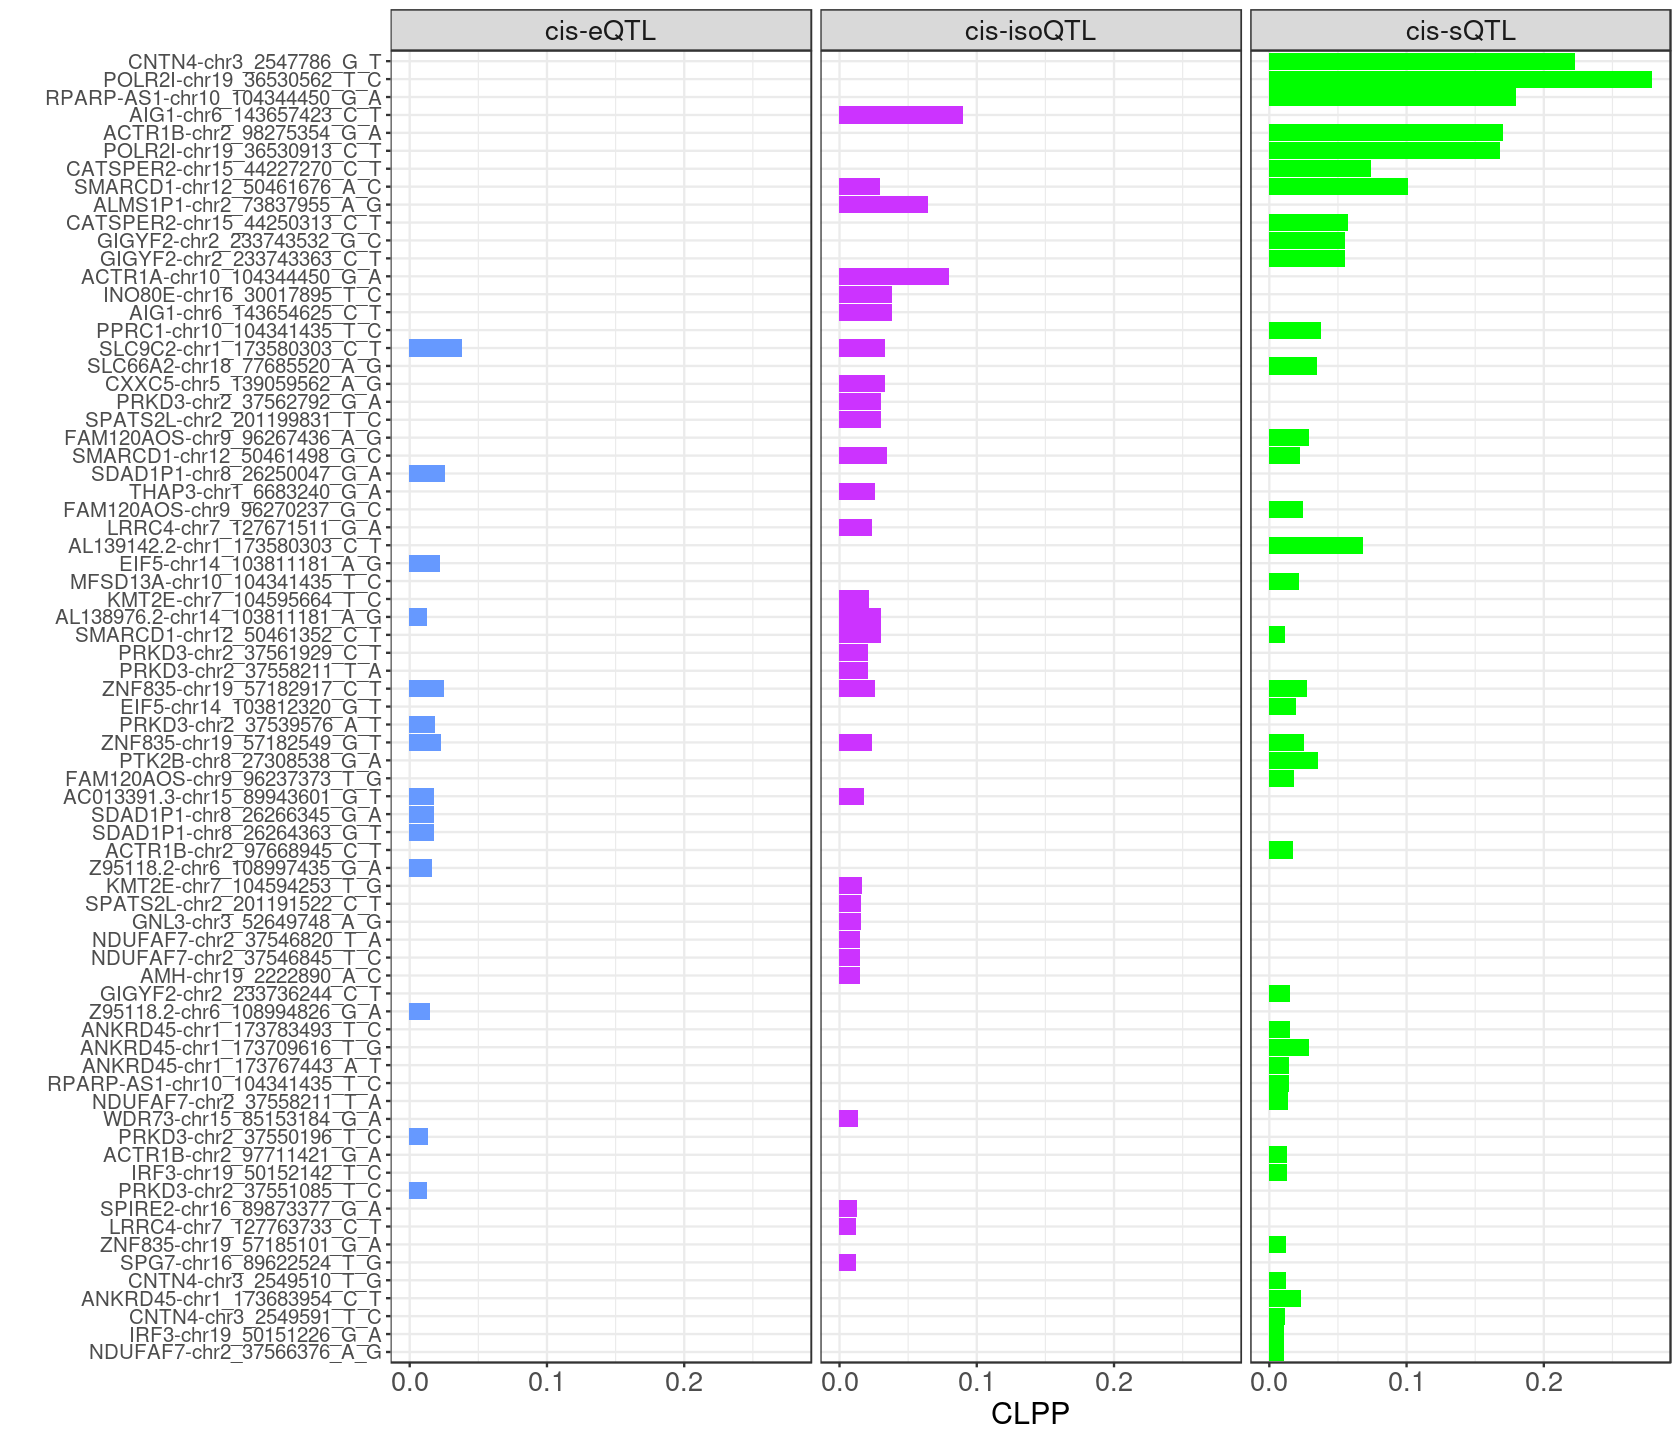

In [59]:
options(repr.plot.width = 14, repr.plot.height = 12)

ggplot(e_iso_s, aes(x = reorder(pair,clpp), y = clpp, fill = group)) + 
    geom_bar(stat = 'identity') + 
    coord_flip() + 
    facet_grid(~group) + 
    theme_bw() + 
    labs(x = "", y = "CLPP", fill = "") +
    theme(axis.text.y = element_text(size = 12),
          axis.text.x = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          strip.text.x = element_text(size = 16)) +
    scale_fill_manual(values=c("#6699FF", "#CC33FF", "#00FF00"))

In [60]:
ggsave("../figures/e_iso_s_clpp.pdf", height = 14, width = 12)

**7: CT-specific eQTL**

In [7]:
cell_typeQTLs <- data.frame()
for(cell in c("end","ex","in","ip","mic","opc","per","pg","rg")) {
#     cat(cell)
  this_cell <- fread(dir(paste0("~/project-gandalm/isoform_twas/eqtl_new/results/susie_finemap/", cell), 
                         pattern = "_purity_filtered.txt.gz", full.names = TRUE), data.table = F)
  cell_typeQTLs = rbind(cell_typeQTLs, data.frame(this_cell, cell = cell))
}

In [20]:
head(cell_typeQTLs)

,phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf,cell
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000173614,chr1_10009219_G_A,1,10009219,G,A,ENSG00000173614_L1,L1,chr1:9003485-11003485,0.0638641,6.850622,0.9748819,0.9882385,10,0.03969205,0.1545286,7.336885,end
2,ENSG00000173614,chr1_10011679_C_T,1,10011679,C,T,ENSG00000173614_L1,L1,chr1:9003485-11003485,0.0638641,6.850622,0.9748819,0.9882385,10,0.03969205,0.1545286,7.336885,end
3,ENSG00000173614,chr1_10011771_G_T,1,10011771,G,T,ENSG00000173614_L1,L1,chr1:9003485-11003485,0.0638641,6.850622,0.9748819,0.9882385,10,0.03969205,0.1545286,7.336885,end
4,ENSG00000173614,chr1_10014434_ACTT_A,1,10014434,ACTT,A,ENSG00000173614_L1,L1,chr1:9003485-11003485,0.1158338,6.930394,0.9748819,0.9882385,10,0.07296249,0.2044913,7.336885,end
5,ENSG00000173614,chr1_10014547_A_G,1,10014547,A,G,ENSG00000173614_L1,L1,chr1:9003485-11003485,0.1158338,6.930394,0.9748819,0.9882385,10,0.07296249,0.2044913,7.336885,end
6,ENSG00000173614,chr1_10015823_G_A,1,10015823,G,A,ENSG00000173614_L1,L1,chr1:9003485-11003485,0.1158338,6.930394,0.9748819,0.9882385,10,0.07296249,0.2044913,7.336885,end


In [8]:
cell_typeQTLs <- cell_typeQTLs %>% dplyr::select(phenotype_id, variant_id, pip, cell)

In [11]:
cell_typeQTLs <- cell_typeQTLs %>% left_join(gencode, by = c("phenotype_id" = "ensg"))

In [12]:
fetal_ct_finemap <- cell_typeQTLs %>% inner_join(finemap, by = "variant_id")
fetal_ct_finemap$clpp <- as.numeric(fetal_ct_finemap$finemap_posterior_probability * fetal_ct_finemap$pip)
cat(paste(sort(unique(fetal_ct_finemap$V12[fetal_ct_finemap$clpp>.01]))),sep='\n')

ANKRD45
CEBPZ
DNAH10OS
EIF5
GNL3
ITIH4
LINC01068
MFAP3
NDUFAF7
PRKD3
SDAD1P1
SLC9C2
SPIRE2
STAB1
TAOK2
ZNF835


In [13]:
fetal_ct_finemap <- fetal_ct_finemap %>% filter(clpp > 0.01) %>% distinct()

In [14]:
fetal_ct_finemap$pair <- paste(fetal_ct_finemap$V12, fetal_ct_finemap$variant_id, sep = "-")

In [15]:
dim(fetal_ct_finemap)

[1] 80 12

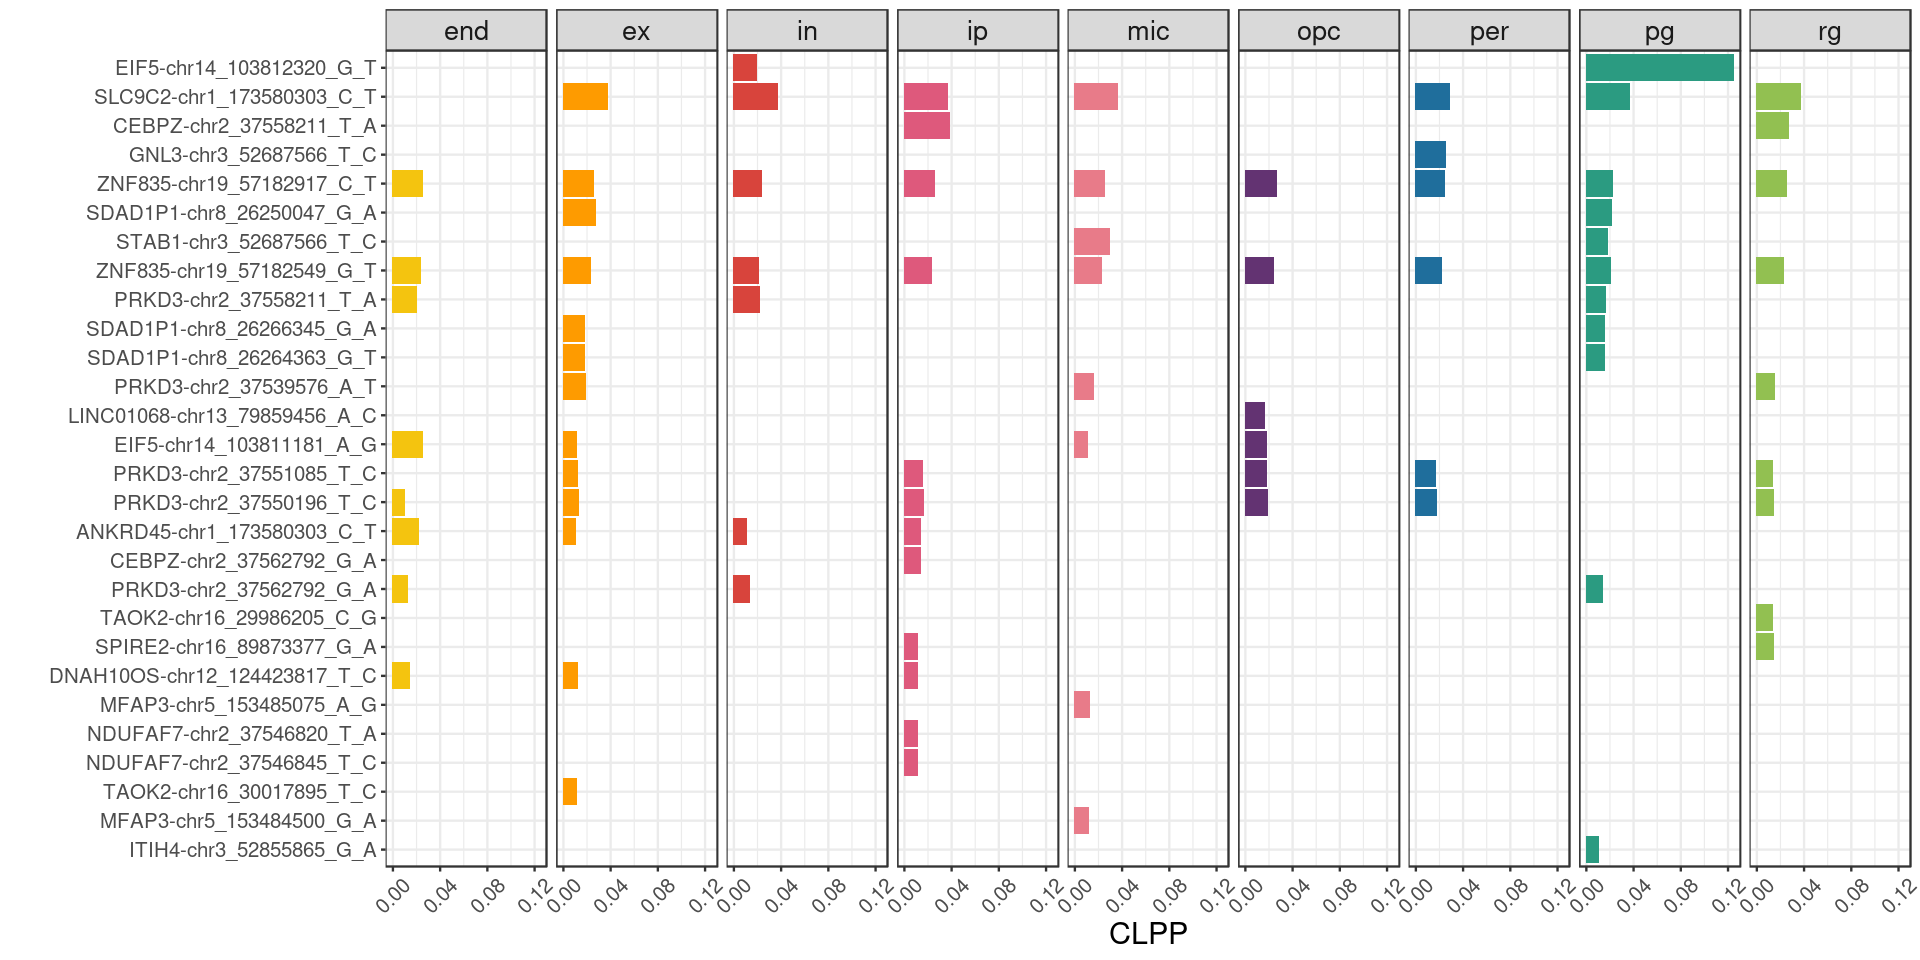

In [70]:
options(repr.plot.width = 16, repr.plot.height = 8)

ggplot(fetal_ct_finemap, aes(x = reorder(pair, clpp), y = clpp, fill = cell)) + 
    geom_bar(stat = 'identity') + 
    coord_flip() + 
    facet_grid(~cell) + 
    theme_bw() + 
    labs(x = "", y = "CLPP", fill = "") +
    theme(axis.text.y = element_text(size = 12),
          axis.text.x = element_text(size = 12, angle = 45, vjust = 0.5),
          axis.title = element_text(size = 18),
          legend.position = "none",
          strip.text.x = element_text(size = 16)) +
    scale_fill_manual(values = met.brewer("Signac",9))

In [71]:
ggsave("../figures/ct_clpp.pdf", height = 8, width = 16)

In [16]:
head(fetal_ct_finemap)

,phenotype_id,variant_id,pip,cell,V12,index.snp,expected.causals_k,rsid,pval,finemap_posterior_probability,clpp,pair
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000183831,chr1_173580303_C_T,0.5797464,end,ANKRD45,rs61828917,1.550525,rs61828917,7.961665e-10,0.0379672,0.02201135,ANKRD45-chr1_173580303_C_T
2,ENSG00000250091,chr12_124423817_T_C,0.9818506,end,DNAH10OS,rs12311848,1.070216,rs4930724,4.765907e-08,0.0142613,0.01400247,DNAH10OS-chr12_124423817_T_C
3,ENSG00000100664,chr14_103811181_A_G,0.7970642,end,EIF5,rs10873538,1.669900,rs3548,1.755914e-07,0.0319383,0.02545688,EIF5-chr14_103811181_A_G
4,ENSG00000127903,chr19_57182549_G_T,0.4773157,end,ZNF835,rs758749,1.097089,rs10084155,3.104830e-07,0.0483364,0.02307172,ZNF835-chr19_57182549_G_T
5,ENSG00000127903,chr19_57182917_C_T,0.4773157,end,ZNF835,rs758749,1.097089,rs1861221,2.800215e-07,0.0533413,0.02546064,ZNF835-chr19_57182917_C_T
6,ENSG00000115825,chr2_37550196_T_C,0.1986272,end,PRKD3,rs3770752,2.058370,rs11689794,3.696091e-10,0.0509653,0.01012309,PRKD3-chr2_37550196_T_C


In [17]:
write.table(fetal_ct_finemap, "../ct_quick_analysis_PGC3.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

### eCAVIAR PGC3 SCZ
- bulk eQTL: 66/288 loci, 98 genes, 242 gene-SNP pairs

In [2]:
eqtl <- read.table("../results_eqtl/PGC3_SCZ_wave3_public.v2/CLPP_sig_info.txt", header = T)

In [3]:
head(eqtl)

,SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,gene_CHR,gene_START,gene_END,gene_strand,gene_type,gene_name
,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,rs11658321,0.990323,0.9999370,102,ENSG00000006744,chr17,12894929,12921382,-,protein_coding,ELAC2
2,rs1731968,0.259392,0.0207984,10,ENSG00000105894,chr7,136912088,137028520,-,protein_coding,PTN
3,rs1559540,0.186613,0.0149629,10,ENSG00000105894,chr7,136912088,137028520,-,protein_coding,PTN
4,rs1559541,0.209633,0.0168087,10,ENSG00000105894,chr7,136912088,137028520,-,protein_coding,PTN
5,rs1647193,0.174751,0.0140118,10,ENSG00000105894,chr7,136912088,137028520,-,protein_coding,PTN
6,rs7609971,0.290978,0.0112274,121,ENSG00000004534,chr3,49977440,50137478,+,protein_coding,RBM6


In [4]:
length(unique(eqtl$locus))
length(unique(eqtl$gene))
dim(eqtl)

[1] 66

[1] 98

[1] 242  11

In [3]:
ct <- read.table("../ct_CLPP_sig_info.txt", header = T)
dim(ct)
# ct <- ct %>% filter(SNP_ID != "SNP_ID")
# write.table(ct, "../ct_CLPP_sig_info.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 1414   12

**68 genes only colocalized in cell types, not bulk**

In [4]:
bulk_gene <- unique(eqtl$gene)
ct_gene <- unique(ct$gene)
sum(!ct_gene %in% bulk_gene)

[1] 68

In [5]:
vec <- ct_gene[which(!ct_gene %in% bulk_gene)]
specific <- ct %>% filter(gene %in% vec)
specific %>% arrange(desc(CLPP))

SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,type,gene_CHR,gene_START,gene_END,gene_strand,gene_type,gene_name
<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
rs6769789,0.8255240,0.5876350,78,ENSG00000023330,mic,chr3,52232102,52248343,+,protein_coding,ALAS1
rs12820906,0.9353630,0.5018560,267,ENSG00000250091,opc,chr12,124410008,124419531,-,lncRNA,DNAH10OS
rs7946709,0.6049900,0.2965630,21,ENSG00000109920,opc,chr11,47738046,47788995,-,protein_coding,FNBP4
rs7946709,0.6097680,0.2965540,21,ENSG00000109920,ex,chr11,47738046,47788995,-,protein_coding,FNBP4
rs7946709,0.6078360,0.2946640,21,ENSG00000109920,pg,chr11,47738046,47788995,-,protein_coding,FNBP4
rs7946709,0.6113640,0.2786840,21,ENSG00000109920,rg,chr11,47738046,47788995,-,protein_coding,FNBP4
rs6769789,0.8007200,0.2026460,6,ENSG00000023330,mic,chr3,52232102,52248343,+,protein_coding,ALAS1
rs4752952,0.3779010,0.1852450,21,ENSG00000109920,opc,chr11,47738046,47788995,-,protein_coding,FNBP4
rs4752952,0.3808850,0.1852390,21,ENSG00000109920,ex,chr11,47738046,47788995,-,protein_coding,FNBP4


**23 loci colocalized in ct specific, but not in bulk**

In [12]:
bulk_loci <- unique(eqtl$locus)
ct_loci <- unique(ct$locus)

In [21]:
sum(!ct_loci %in% bulk_loci)

[1] 23

In [17]:
ct_loci[which(!ct_loci %in% bulk_loci)]

[1] "167" "244" "46"  "82"  "134" "150" "240" "24"  "258" "262" "85"  "86" 
[13] "37"  "97"  "84"  "160" "191" "70"  "140" "145" "267" "55"  "75"

In [22]:
ct %>% filter(locus == "24")

SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,type,gene_CHR,gene_START,gene_END,gene_strand,gene_type,gene_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rs502834,0.403924,0.01669,24,ENSG00000166086,ex,chr11,133938966,134021896,+,protein_coding,JAM3
rs502834,0.33984,0.0125722,24,ENSG00000166086,ip,chr11,133938966,134021896,+,protein_coding,JAM3
rs502834,0.421381,0.0102433,24,ENSG00000166086,rg,chr11,133938966,134021896,+,protein_coding,JAM3


**Of the 23 loci, how many of cell types are they colocalized in**

In [23]:
vec <- ct_loci[which(!ct_loci %in% bulk_loci)]
specific <- ct %>% filter(locus %in% vec)

In [25]:
table(specific$type)


end  ex  in  ip mic opc per  pg  rg 
  7  11   2  10   5   7   2   8  11 

In [26]:
specific %>% filter(type == "in")

SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,type,gene_CHR,gene_START,gene_END,gene_strand,gene_type,gene_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rs6738113,0.31887,0.0103818,134,ENSG00000076003,in,chr2,136597196,136634013,-,protein_coding,MCM6
rs12104272,0.736847,0.0148415,37,ENSG00000131408,in,chr19,50832910,50886645,+,protein_coding,NR1H2


In [27]:
specific %>% filter(type == "per")

SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,type,gene_CHR,gene_START,gene_END,gene_strand,gene_type,gene_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rs1994190,0.721043,0.0135835,160,ENSG00000138756,per,chr4,79697496,79837526,+,protein_coding,BMP2K
rs7606840,0.73193,0.0712639,167,ENSG00000138073,per,chr2,27353624,27357534,-,protein_coding,PREB


In [28]:
specific %>% arrange(desc(CLPP))

SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,type,gene_CHR,gene_START,gene_END,gene_strand,gene_type,gene_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rs12820906,0.935363,0.501856,267,ENSG00000250091,opc,chr12,124410008,124419531,-,lncRNA,DNAH10OS
rs7606840,0.803164,0.109328,167,ENSG00000138028,pg,chr2,27321757,27341996,-,protein_coding,CGREF1
rs7606840,0.572933,0.108017,167,ENSG00000138028,mic,chr2,27321757,27341996,-,protein_coding,CGREF1
rs7606840,0.767813,0.106247,167,ENSG00000138028,ip,chr2,27321757,27341996,-,protein_coding,CGREF1
rs7606840,0.720406,0.102468,167,ENSG00000138028,opc,chr2,27321757,27341996,-,protein_coding,CGREF1
rs7606840,0.738838,0.0958184,167,ENSG00000138028,end,chr2,27321757,27341996,-,protein_coding,CGREF1
rs7606840,0.73193,0.0712639,167,ENSG00000138073,per,chr2,27353624,27357534,-,protein_coding,PREB
rs3769139,0.884254,0.0541878,167,ENSG00000138030,pg,chr2,27309615,27323630,+,protein_coding,KHK
rs3769139,0.846948,0.0448932,167,ENSG00000138030,end,chr2,27309615,27323630,+,protein_coding,KHK


In [29]:
write.table(specific %>% arrange(desc(CLPP)), "../ct_only_CLPP_sig_info.txt", col.names = T, row.names = F, quote = F, sep = "\t")

In [35]:
specific %>% arrange(as.numeric(locus))

SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,type,gene_CHR,gene_START,gene_END,gene_strand,gene_type,gene_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rs502834,0.403924,0.01669,24,ENSG00000166086,ex,chr11,133938966,134021896,+,protein_coding,JAM3
rs502834,0.33984,0.0125722,24,ENSG00000166086,ip,chr11,133938966,134021896,+,protein_coding,JAM3
rs502834,0.421381,0.0102433,24,ENSG00000166086,rg,chr11,133938966,134021896,+,protein_coding,JAM3
rs12104272,0.736847,0.0148415,37,ENSG00000131408,in,chr19,50832910,50886645,+,protein_coding,NR1H2
rs253376,0.541867,0.0107132,46,ENSG00000184903,end,chr7,110302700,111202573,-,protein_coding,IMMP2L
rs2741348,0.974511,0.0427685,55,ENSG00000104290,pg,chr8,28351722,28431784,+,protein_coding,FZD3
rs10927035,0.57088,0.014948,70,ENSG00000054282,rg,chr1,243419336,243663393,+,protein_coding,SDCCAG8
rs7714751,0.424049,0.0111426,75,ENSG00000120727,opc,chr5,138677276,138705409,+,protein_coding,PAIP2
rs253376,0.558505,0.0211155,82,ENSG00000184903,end,chr7,110302700,111202573,-,protein_coding,IMMP2L


In [38]:
length(unique(eqtl$locus))
length(unique(ct[ct$type == "end", "locus"]))
length(unique(ct[ct$type == "end", "locus"]))
length(unique(ct[ct$type == "end", "locus"]))
length(unique(ct[ct$type == "end", "locus"]))
length(unique(ct[ct$type == "end", "locus"]))
length(unique(ct[ct$type == "end", "locus"]))

[1] 66

[1] 56

In [44]:
for (type in c("end", "ex", "in", "ip", "mic", "per", "rg", "pg", "opc")) {
#     cat(type, "\n")
    cat(length(unique(ct[ct$type == type, "locus"])), "\n")
}

56 
61 
48 
56 
34 
28 
58 
56 
37 


In [68]:
df <- data.frame("GWAS" = rep("PGC3 SCZ (288)", 10),
                 "Group" = c("Bulk cis-eQTL", "end", "ex", "in", "ip", "mic", "per", "rg", "pg", "opc"),
                 "number" = c(66, 56, 61, 48, 56, 34, 28, 58, 56, 37))

In [69]:
df$Group <- factor(df$Group, levels = rev(c("Bulk cis-eQTL", "end", "ex", "in", "ip", "mic", "opc", "per", "pg", "rg")))

In [80]:
df

GWAS,Group,number
<chr>,<fct>,<dbl>
PGC3 SCZ (288),Bulk cis-eQTL,66
PGC3 SCZ (288),end,56
PGC3 SCZ (288),ex,61
PGC3 SCZ (288),in,48
PGC3 SCZ (288),ip,56
PGC3 SCZ (288),mic,34
PGC3 SCZ (288),per,28
PGC3 SCZ (288),rg,58
PGC3 SCZ (288),pg,56


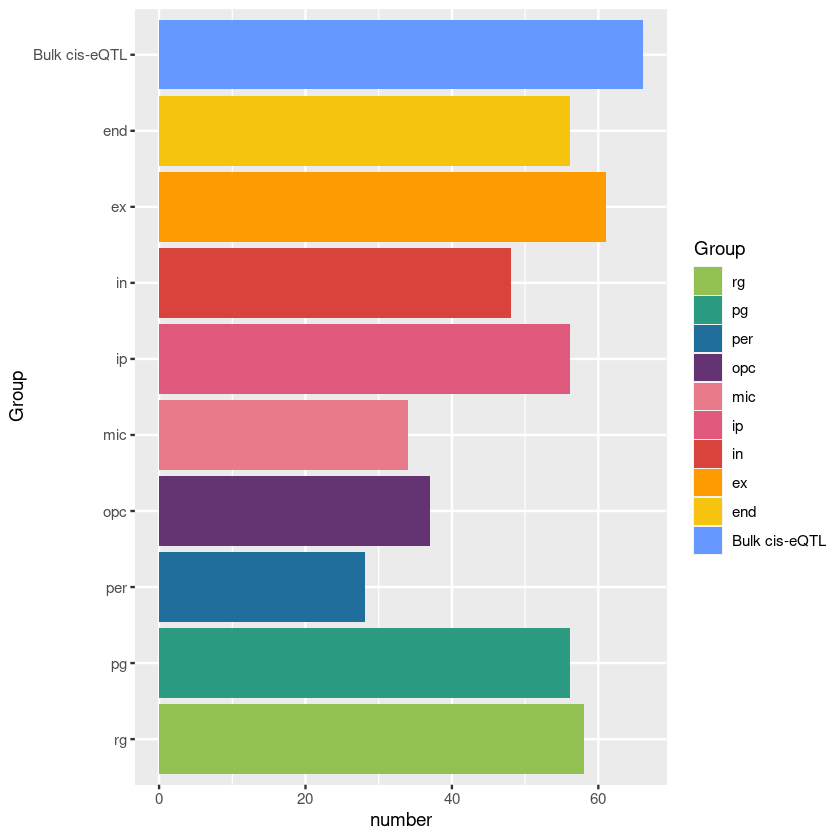

In [84]:
ggplot(df, aes(x = number, y = Group, fill = Group)) +
    geom_bar(position = "dodge", stat = "identity") +
    scale_fill_manual(values = rev(c("#6699FF", met.brewer("Signac",9))))

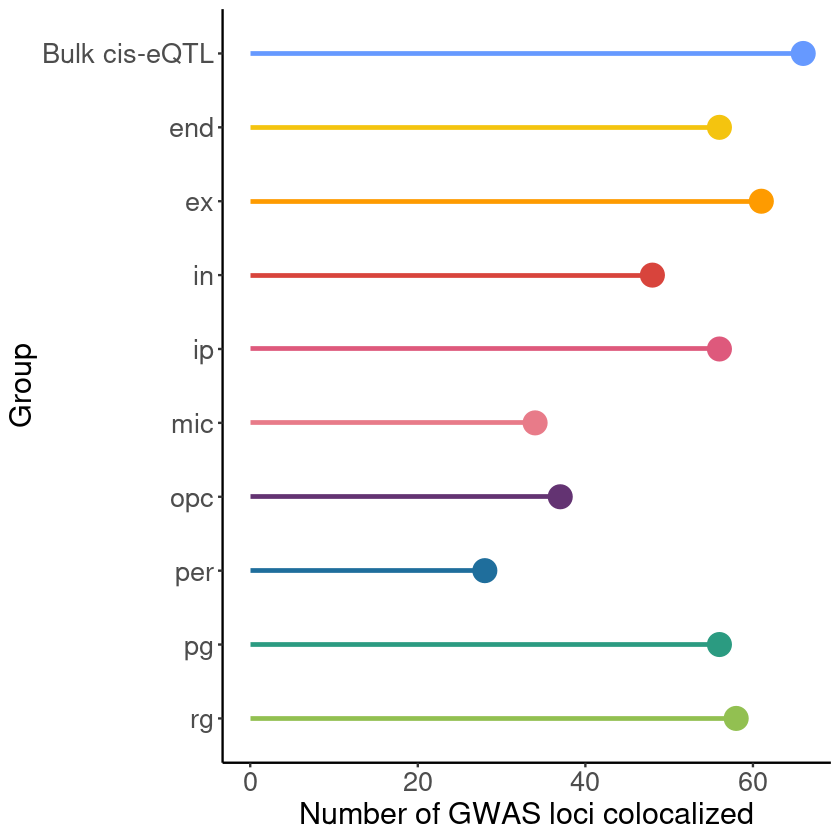

In [99]:
ggplot(df, aes(x = number, y = Group, color = Group)) +
    geom_point(size = 6) +
    geom_segment(aes(x = 0, y = Group, xend = number, yend = Group), size = 1) +
    scale_color_manual(values = rev(c("#6699FF", met.brewer("Signac",9)))) +
    theme_classic() +
theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "none") +
    labs(x = "Number of GWAS loci colocalized")

In [5]:
bulk_loci <- unique(eqtl$locus)

In [6]:
length(bulk_loci)

[1] 66

In [34]:
for (cell in c("end", "ex", "in", "ip", "mic", "per", "rg", "pg", "opc")) {
    print(cell)
    print(sum(!unique(ct[ct$type == eval(cell),'locus']) %in% bulk_loci))
}

[1] "end"
[1] 4
[1] "ex"
[1] 10
[1] "in"
[1] 2
[1] "ip"
[1] 8
[1] "mic"
[1] 2
[1] "per"
[1] 2
[1] "rg"
[1] 10
[1] "pg"
[1] 7
[1] "opc"
[1] 4


In [42]:
df <- data.frame("GWAS" = rep("PGC3 SCZ (288)", 10),
                 "Group" = c("Bulk cis-eQTL", "end", "ex", "in", "ip", "mic", "per", "rg", "pg", "opc"),
                 "number" = c(66, 56, 61, 48, 56, 34, 28, 58, 56, 37),
                 "specific" = c(0, 4, 10, 2, 8, 2, 2, 10, 7, 4))

In [43]:
df <- df %>% mutate(shared = number - specific)

In [44]:
head(df)

,GWAS,Group,number,specific,shared
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,PGC3 SCZ (288),Bulk cis-eQTL,66,0,66
2,PGC3 SCZ (288),end,56,4,52
3,PGC3 SCZ (288),ex,61,10,51
4,PGC3 SCZ (288),in,48,2,46
5,PGC3 SCZ (288),ip,56,8,48
6,PGC3 SCZ (288),mic,34,2,32


In [45]:
df <- df %>% select(Group, shared, specific)
df2 <- melt(df)

Warning message in melt(df):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df). In the next version, this warning will become an error.”
Using Group as id variables



In [47]:
df2

Group,variable,value
<chr>,<fct>,<dbl>
Bulk cis-eQTL,shared,66
end,shared,52
ex,shared,51
in,shared,46
ip,shared,48
mic,shared,32
per,shared,26
rg,shared,48
pg,shared,49


In [48]:
df2$variable <- c(rep("Shared with bulk eQTL", 10), rep("Cell type-specific", 10))

In [49]:
df2$variable <- factor(df2$variable, levels = c("Cell type-specific", "Shared with bulk eQTL"))

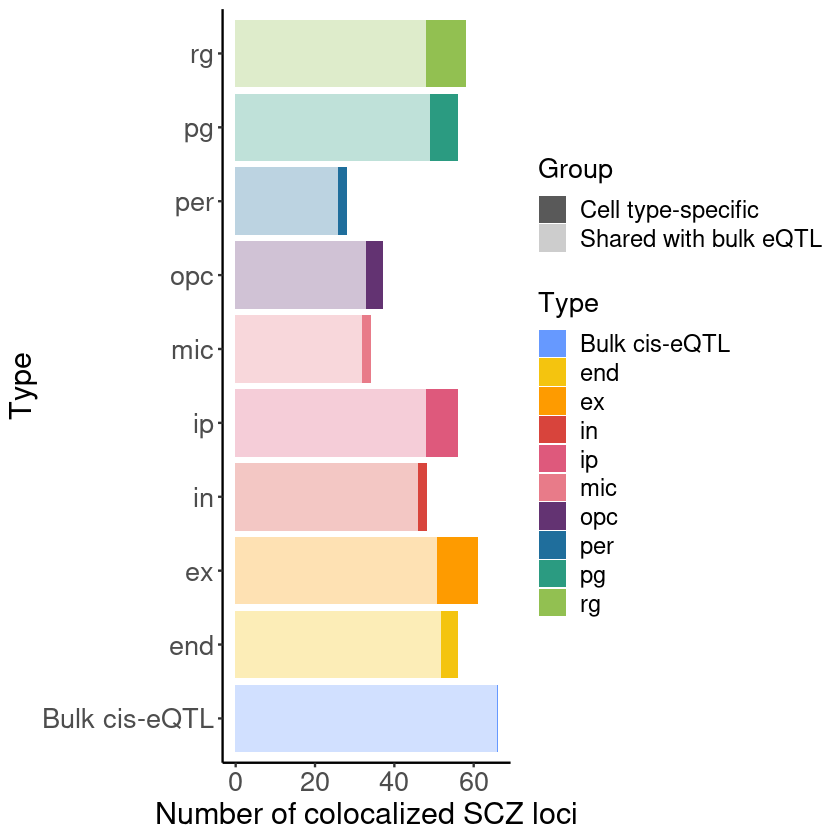

In [53]:
ggplot(df2, aes(x = value, y = Group, fill = Group, alpha = variable)) +
geom_bar(position = "stack", stat = "identity") +
    labs(x = "Number of colocalized SCZ loci", 
         y = "Type",
         fill = "Type", 
         alpha = "Group") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_alpha_manual(values = c(1, 0.3)) +
    scale_fill_manual(values = c("#6699FF", met.brewer("Signac",9)))

In [54]:
ggsave("../figures/ct_bulk.pdf", height = 6, width = 7)